In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_ad_pub_csv():
    ad_pub_df = pd.read_csv("ad_pub.csv", header=None)
    ad_pub_df.columns = ["ad_id", "pub_id", "clicked", "viewed"]
    return ad_pub_df

In [3]:
ad_pub_df = load_ad_pub_csv()

In [4]:
ad_pub_df

,ad_id,pub_id,clicked,viewed
0,592627,2433,0,14
1,574088,50,1,16430
2,330640,50,1,1462
3,537352,50,0,226
4,537350,4638,0,1
...,...,...,...,...
12005101,397926,25651,0,2
12005102,596864,25651,0,6
12005103,595411,25651,0,2
12005104,553678,25372,0,1


In [5]:
len(ad_pub_df.ad_id.unique())

34554

In [6]:
ad_df = pd.read_csv("ad_items.csv", index_col=0)

In [7]:
def load_ad_attributes():
    ad_df = pd.read_csv("ad_items.csv", index_col=0)
    ad_df.drop_duplicates(subset=["id"], ignore_index=True, inplace=True)
    return ad_df

In [8]:
ad_df = load_ad_attributes()

In [9]:
ad_df.loc[0,"image_url"]

'https://ad-management-cdn.yektanet.com/media/items/8370.jpg'

In [10]:
len(ad_df.id.unique())

601921

In [11]:
final_df = pd.merge(ad_df, ad_pub_df, left_on="id", right_on="ad_id")

In [12]:
final_df.to_csv("merged_tables.csv")

KeyboardInterrupt: 

In [13]:
len(final_df.id.unique())

34554

In [14]:
final_df

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ad_id,pub_id,clicked,viewed
0,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,19846,0,2
1,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,9214,0,1
2,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,6509,0,4
3,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,9785,0,12
4,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,16405,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005101,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,214,0,133
12005102,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,3042,0,7
12005103,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,1067,0,2
12005104,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,5933,0,5


In [15]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [332]:
class PublisherAnalyzer():
    def __init__(self, ad_pub_df):
        self.ad_pub_df = ad_pub_df
    
    def find_pub_mean_ctr(self, pub_id):
        df = ad_pub_df[ad_pub_df["pub_id"]==pub_id]
        if sum(df["viewed"]) == 0:
            return 0
        mean_ctr = sum(df["clicked"])/sum(df["viewed"])
        return mean_ctr
        
    def find_all_pubs_mean_ctr(self, ad_pub_df):
        final_df = self.ad_pub_df.copy()
        final_df["pub_mean_ctr"] = np.empty(len(final_df))
        for pub_id in tqdm(final_df.pub_id.unique()): 
            final_df.loc[final_df.pub_id == pub_id, "pub_mean_ctr"] = self.find_pub_mean_ctr(pub_id)
        return(final_df)
    
        
    def normalize_all_ctrs(self):
        final_df = self.find_all_pubs_mean_ctr(self.ad_pub_df)
        system_mean_ctr = np.mean(final_df.pub_mean_ctr)
        final_df["ctr"] = np.zeros(len(final_df))
        for ad_id in tqdm(final_df.ad_id.unique()):
            current_ad_df = final_df[final_df.ad_id == ad_id]
            if np.sum(current_ad_df.viewed) == 0:
                true_ctr = 0
            else:
                true_ctr = np.sum(np.divide(current_ad_df.clicked, current_ad_df.pub_mean_ctr))/np.sum(current_ad_df.viewed)
                true_ctr = true_ctr * system_mean_ctr
            final_df.loc[final_df.ad_id == ad_id, "ctr"] = true_ctr
            
        return final_df

In [338]:
pub_mean_ctrs = []
pub_analyzer = PublisherAnalyzer(ad_pub_df)
for id in tqdm(ad_pub_df.pub_id.unique()):
    mean_ctr = pub_analyzer.find_pub_mean_ctr(id)
    if mean_ctr< 0.005 and mean_ctr>0.0001:
        pub_mean_ctrs.append([id,mean_ctr])

100%|██████████| 3408/3408 [00:18<00:00, 179.84it/s]


In [339]:
pub_mean_ctrs_df = pd.DataFrame(pub_mean_ctrs, columns=["pub_id", "mean_ctr"])

Text(0, 0.5, 'number of publishers')

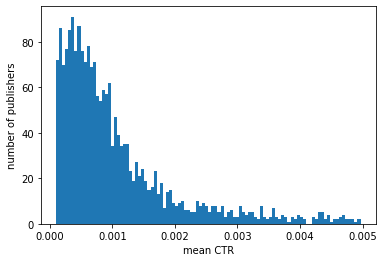

In [340]:
fig = plt.figure()
plt.hist(pub_mean_ctrs_df.mean_ctr, bins=100)

plt.xlabel('mean CTR')
plt.ylabel('number of publishers')

# Excluding Outlier Publishers From Dataset

source : https://www.askpython.com/python/examples/detection-removal-outliers-in-python

<AxesSubplot:>

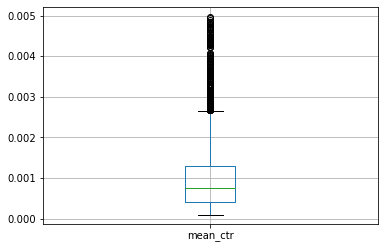

In [22]:
pub_mean_ctrs_df.boxplot(["mean_ctr"])

In [23]:
q75,q25 = np.percentile(pub_mean_ctrs_df.mean_ctr,[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
pub_mean_ctrs_df.loc[pub_mean_ctrs_df.mean_ctr < min,"mean_ctr"] = np.nan
pub_mean_ctrs_df.loc[pub_mean_ctrs_df.mean_ctr > max,"mean_ctr"] = np.nan

In [24]:
pub_mean_ctrs_df.dropna(inplace=True)

<AxesSubplot:>

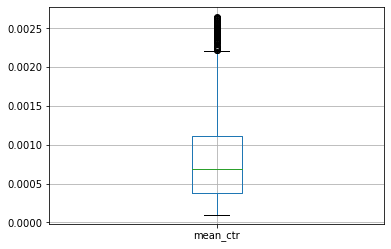

In [25]:
pub_mean_ctrs_df.boxplot(["mean_ctr"])

In [46]:
pub_mean_ctrs_df

,pub_id,mean_ctr
0,26005,0.001531
2,26002,0.001794
4,25988,0.000000
6,25985,0.000199
7,25977,0.000307
...,...,...
3403,13,0.000000
3404,9,0.000000
3405,7,0.000000
3406,4,0.000911


In [52]:
final_df_valid_publishers = final_df[final_df["pub_id"].isin(pub_mean_ctrs_df["pub_id"])]

In [53]:
final_df_valid_publishers.to_csv("valid_publishers_impressions.csv") 

# Preprocessing Ads CTRs

## Normalize Ads CTRs Based on Publishers' Mean CTRs

In [341]:
final_df_valid_publishers = pd.read_csv("valid_publishers_impressions.csv", index_col=0)

/Users/milad/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [342]:
publisher_analyzer = PublisherAnalyzer(final_df_valid_publishers)

In [343]:
from tqdm import tqdm

In [363]:
df = publisher_analyzer.normalize_all_ctrs()

100%|██████████| 34553/34553 [13:41<00:00, 42.04it/s]


In [364]:
df

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ad_id,pub_id,clicked,viewed,pub_mean_ctr,ctr
0,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,19846,0,2,0.000795,0.000000
1,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,9214,0,1,0.000579,0.000000
2,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,6509,0,4,0.000892,0.000000
3,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,9785,0,12,0.001178,0.000000
4,22086,زیما سفر پارس,2017-12-18 18:10:31+03:30,https://ad-management-cdn.yektanet.com/media/i...,2375,996,اختصاصی لست سکند,last,[],22086,16405,0,3,0.000822,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005101,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,214,0,133,0.000787,0.002295
12005102,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,3042,0,7,0.000760,0.002295
12005103,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,1067,0,2,0.001975,0.002295
12005104,611050,پزشک و پرستاری درمنزل در شیراز,2022-06-27 23:07:49.625370+04:30,https://ad-management-cdn.yektanet.com/media/a...,214052,60515,شیراز درمان کلی,Shirazdarman.com,[3],611050,5933,0,5,0.000458,0.002295


## Removing Ads with veiws lower than a treshhold

In [365]:
view_treshhold = 3000
new_df = df.groupby(by="id").sum()

In [366]:
new_df

,campaign_id,advertiser_id,ad_id,pub_id,clicked,viewed,pub_mean_ctr,ctr
id,,,,,,,,
22086,263625,110556,2451546,984436,0,972,0.083703,0.000000
22087,268375,112548,2495831,1032995,1,910,0.084416,0.105402
22088,254125,106572,2363416,856936,0,897,0.084787,0.000000
22089,273125,114540,2540235,904531,0,962,0.085947,0.000000
48213,966375,394500,6026625,1138453,3,44738,0.099443,0.018314
...,...,...,...,...,...,...,...,...
611032,63999523,18290265,183920632,2214580,164,74948,0.266554,0.562575
611034,50076000,7035912,142981956,2036105,24,15377,0.189463,0.546168
611043,47391068,13436642,136262589,2074492,3,5475,0.205247,0.217283


In [381]:
final_ad_ctr_df = df.groupby(by="id").first()
final_ad_ctr_df.drop(columns=["ad_id", "pub_id", "clicked", "viewed", "pub_mean_ctr"], inplace=True)

In [382]:
final_ad_ctr_df.drop(index=new_df[new_df.viewed < view_treshhold].index, inplace=True)

In [383]:
final_ad_ctr_df

,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr
id,,,,,,,,,
48213,۱۰ سایت برتر دانلود رایگان کتاب خارجی (بروز شد),2018-09-06 15:32:11.299022+04:30,https://ad-management-cdn.yektanet.com/media/i...,7731,3156,کتابناک,iranpaper.ir,[],0.000147
65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001236
67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000496
67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000580
75370,ترجمه تخصصی مقاله فارسی به انگلیسی برای چاپ در...,2019-03-07 14:51:13.641850+03:30,https://ad-management-cdn.yektanet.com/media/i...,16613,6189,ترجمه فارسی به انگلیسی,tarjomic.com,[],0.000525
...,...,...,...,...,...,...,...,...,...
611032,جاروبرقی سطلی تامیما مدل 8000 قیمت: فقط 1،350،000,2022-06-27 21:15:46.011428+04:30,https://ad-management-cdn.yektanet.com/media/a...,212623,60765,فروش فوق العاده,general-heydari.com,[8],0.001869
611034,دیپلم داری؟! بدون کنکور دانشجو شو...,2022-06-27 22:09:25.772345+04:30,https://ad-management-cdn.yektanet.com/media/a...,214000,30068,اخبار خودرو سینما، دانلود فیلم و اخبار بازیگران,uast1.ir,"[110, 0, 100]",0.002334
611043,9 دلیل هوشمندانه، برای انتخاب دکتر شیبانی نیا،...,2022-06-27 22:23:45.196076+04:30,https://ad-management-cdn.yektanet.com/media/a...,212516,60254,کلید واژه - آیفون,sheibaninia.net,"[3, 5, 17]",0.000974


## Removing Ads with ctr equals to 0 

In [384]:
final_ad_ctr_df.drop(index = final_ad_ctr_df[final_ad_ctr_df.ctr == 0].index , inplace=True)

In [385]:
final_ad_ctr_df

,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr
id,,,,,,,,,
48213,۱۰ سایت برتر دانلود رایگان کتاب خارجی (بروز شد),2018-09-06 15:32:11.299022+04:30,https://ad-management-cdn.yektanet.com/media/i...,7731,3156,کتابناک,iranpaper.ir,[],0.000147
65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001236
67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000496
67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000580
75370,ترجمه تخصصی مقاله فارسی به انگلیسی برای چاپ در...,2019-03-07 14:51:13.641850+03:30,https://ad-management-cdn.yektanet.com/media/i...,16613,6189,ترجمه فارسی به انگلیسی,tarjomic.com,[],0.000525
...,...,...,...,...,...,...,...,...,...
611032,جاروبرقی سطلی تامیما مدل 8000 قیمت: فقط 1،350،000,2022-06-27 21:15:46.011428+04:30,https://ad-management-cdn.yektanet.com/media/a...,212623,60765,فروش فوق العاده,general-heydari.com,[8],0.001869
611034,دیپلم داری؟! بدون کنکور دانشجو شو...,2022-06-27 22:09:25.772345+04:30,https://ad-management-cdn.yektanet.com/media/a...,214000,30068,اخبار خودرو سینما، دانلود فیلم و اخبار بازیگران,uast1.ir,"[110, 0, 100]",0.002334
611043,9 دلیل هوشمندانه، برای انتخاب دکتر شیبانی نیا،...,2022-06-27 22:23:45.196076+04:30,https://ad-management-cdn.yektanet.com/media/a...,212516,60254,کلید واژه - آیفون,sheibaninia.net,"[3, 5, 17]",0.000974


In [389]:
final_ad_ctr_df = final_ad_ctr_df[final_ad_ctr_df.ctr != np.Inf]

Text(0, 0.5, 'number of ads')

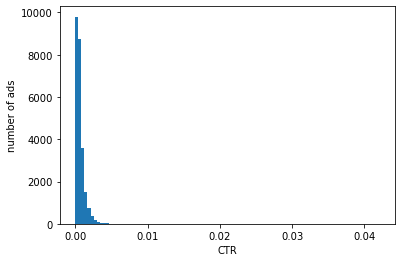

In [390]:
plt.hist(final_ad_ctr_df.ctr, bins=100 )
plt.xlabel('CTR')
plt.ylabel('number of ads')


## Removing Outlier Ads (Based on Their CTRs)

<AxesSubplot:>

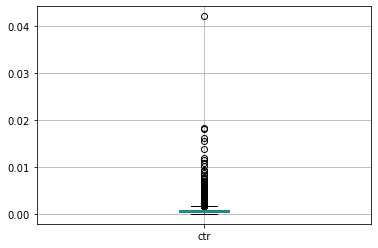

In [392]:
final_ad_ctr_df.boxplot(["ctr"])

In [393]:
q75,q25 = np.percentile(final_ad_ctr_df.ctr,[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
final_ad_ctr_df.loc[final_ad_ctr_df.ctr < min,"ctr"] = np.nan
final_ad_ctr_df.loc[final_ad_ctr_df.ctr > max,"ctr"] = np.nan

/Users/milad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/milad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [394]:
final_ad_ctr_df.dropna(inplace=True)

<ipython-input-394-cb53d8b14bde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ad_ctr_df.dropna(inplace=True)


<AxesSubplot:>

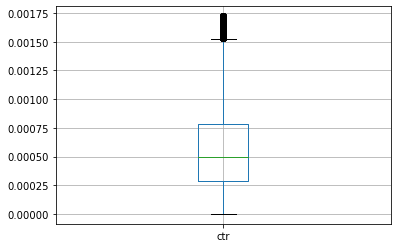

In [395]:
final_ad_ctr_df.boxplot(["ctr"])

In [396]:
len(final_ad_ctr_df.index.unique())

23697

Text(0, 0.5, 'number of ads')

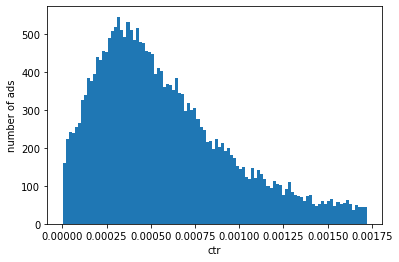

In [397]:
final_ad_ctr_df.reset_index(inplace=True)
plt.hist(final_ad_ctr_df.ctr, bins=100)
plt.xlabel('ctr')
plt.ylabel('number of ads')


In [96]:
final_ad_ctr_df.to_csv("preprocessed_ad_ctr_df.csv")

## Calculating Image Complexities for each Ad

In [35]:
import cv2
from tqdm import tqdm
import numpy as np

In [36]:
class ComplexityEstimator():

    def __init__(self):
        self.i_range, self.j_range = 9,9
        self.gama = 14

        
    def calculate_complexity_fast(self, img):
        #link : https://towardsdatascience.com/one-simple-trick-for-speeding-up-your-python-code-with-numpy-1afc846db418
        
        arr = np.array(img)
        length = arr.shape[0]
        width = arr.shape[1]
        final_arr = []
        window_size = 9

        for i in range(window_size):
            for j in range(window_size):
                new_arr = arr[i:length-window_size+i, j:width-window_size+j,:]
                row = new_arr.reshape((length-window_size)*(width-window_size),3)

                final_arr.append(list(row))
        final_arr = np.array(final_arr)
        final_arr.shape
        c_bar = np.mean(final_arr, axis=0)
        subtracted = np.subtract(final_arr, c_bar)
        squared_subtracted = np.power(subtracted,2)
        euclidean_distance = np.sum(squared_subtracted, axis=2)

        sqrt = np.sqrt(euclidean_distance)
        diff = np.subtract(1,np.exp(-sqrt/14))

        mean_diff = np.mean(diff, axis=0)
        sigma_diff = np.var(diff, axis=0)

        p = np.divide(-np.power(np.subtract(diff,mean_diff),2), np.multiply(2,sigma_diff+0.0000001))
        gw = np.multiply(np.exp(p), diff)
        phi = np.sum(gw, axis= 0)
        complexity = np.mean(phi)

        return(complexity)
        
    def calculate_complexity(self, image): #image is an array with the shape of n*n*3
        # for i in windows:
        #     sum_of(calculate_window_phi)
        window_phi_list = []
        for i in range(image.shape[0]-9):
            for j in range(image.shape[1]-9):
                window = image[i:i+9, j:j+9, :]
                window_phi_list.append(self.calculate_window_phi(window))
        complexity = sum(window_phi_list)/((image.shape[0]-9)*(image.shape[1]-9))
        return(complexity)
        
        
        
    def calculate_window_phi(self, array): # input : 9*9*3 array of each pixel 
        color_differences = []
        window_mean_hue = np.mean(array[:,:,0])
        window_mean_saturation = np.mean(array[:,:,1])
        window_mean_value = np.mean(array[:,:,2])
        window_mean_color = [window_mean_hue, window_mean_saturation, window_mean_value]
        for i in range(array.shape[0]):
            for j in range(array.shape[1]):
                color_differences.append(self.calculate_color_difference(array[i,j], window_mean_color))
        phi = self.calculate_gaussianweighted_sum(color_differences)
        return(phi)
        
    
    def calculate_color_difference(self, point_1, point_2):
        difference = 1 - np.exp(-(self.calculate_euclidean_distance(point_1,point_2)/self.gama))
        return(difference)
    
    def calculate_euclidean_distance(self, point_1, point_2):
        distance = np.sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2 +(point_1[2]-point_2[2])**2)
        return(distance)
    
    def calculate_gaussianweighted_sum(self, array):
        mean = np.mean(array)
        sigma = np.var(array)
        if sigma == 0:
            return(0)
        weighted_array = []
        for a in array:
            weight = np.exp(-((a-mean)**2)/(2*(sigma)))
            weighted_array.append(weight*a)
        return(sum(weighted_array))
            
        
    
    

In [64]:
unique_ad_id_df = final_df.groupby("id").first()

In [65]:
unique_ad_id_df["complexity"] = ""

In [66]:
# unique_ad_id_df = final_df.groupby("id").first()
for i, row in tqdm(unique_ad_id_df.iterrows()):
    unique_ad_id_df.loc[i,"complexity"] = ComplexityEstimator.calculate_complexity()
    

0it [00:00, ?it/s]


TypeError: calculate_complexity() missing 2 required positional arguments: 'self' and 'image'

In [67]:
unique_ad_id_df

,title,image,campaign_id,clicked,viewed,ad_id,pub_id,complexity
id,,,,,,,,
16331,به یک تور گاید حرفه ای تبدیل شوید! ثبت نام اقس...,https://ad-management-cdn.yektanet.com/media/C...,1850,0,5,16331,20192,
16367,آموزش هتلداری با مناسب ترین قیمت,https://ad-management-cdn.yektanet.com/media/C...,1850,0,9,16367,584,
22086,زیما سفر پارس,https://ad-management-cdn.yektanet.com/media/C...,2375,0,7,22086,18145,
22087,آمیتیس بال پارس,https://ad-management-cdn.yektanet.com/media/C...,2375,0,76,22087,8008,
22088,آمیتیس بال پارس,https://ad-management-cdn.yektanet.com/media/C...,2375,0,2,22088,9785,
...,...,...,...,...,...,...,...,...
552260,تجربیات کارآفرینان استارتاپی ایران در ویدئوکست...,https://ad-management-cdn.yektanet.com/media/C...,68733,0,1,552260,2781,
552261,تجربیات کارآفرینان استارتاپی ایران در ویدئوکست...,https://ad-management-cdn.yektanet.com/media/C...,45561,0,2,552261,14929,
552263,پادکست و ویدئوکست شعاع کاری از دانشگاه شریف بر...,https://ad-management-cdn.yektanet.com/media/C...,52410,0,18,552263,91,


In [166]:
import requests
import shutil




for i, row in tqdm(unique_ad_id_df.iloc[2706+4200:].iterrows()):
    url = row.image
    r = requests.get(url, stream=True)
    in_memory_file = io.BytesIO(r.content)
    if r.status_code == 200:
        with open("ad_images/{}.png".format(i), 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

21it [02:20,  6.69s/it]


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [179]:
from tqdm.notebook import tqdm
tqdm.pandas()

  0%|          | 0/3200629 [00:00<?, ?it/s]

In [183]:
ad_performance = final_df.loc[:,["id","clicked","viewed"]].groupby("id").sum()

In [185]:
ad_performance["ctr"] = ad_performance.progress_apply(lambda row: row.clicked/row.viewed if row.viewed>0 else 0 , axis=1)

  0%|          | 0/10420 [00:00<?, ?it/s]

In [187]:
ad_performance

,clicked,viewed,ctr
id,,,
16331,61,53212,0.001146
16367,106,78882,0.001344
22086,0,1000,0.000000
22087,1,920,0.001087
22088,0,910,0.000000
...,...,...,...
552260,14,117641,0.000119
552261,2,2346,0.000853
552263,3,9954,0.000301


In [188]:
import os.path

In [191]:
ad_performance["id"] = ad_performance.index

In [195]:
ad_performance

,clicked,viewed,ctr,id,complexity
id,,,,,
16331,61,53212,0.001146,16331,None
16367,106,78882,0.001344,16367,None
22086,0,1000,0.000000,22086,None
22087,1,920,0.001087,22087,None
22088,0,910,0.000000,22088,None
...,...,...,...,...,...
552260,14,117641,0.000119,552260,None
552261,2,2346,0.000853,552261,None
552263,3,9954,0.000301,552263,None


In [207]:
complexity_estimator = ComplexityEstimator()

ad_performance["complexity"] = ad_performance.progress_apply(lambda row: complexity_estimator.calculate_complexity_by_id(row.id), axis=1)
        

  0%|          | 0/10420 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'shape'

In [194]:
compl

,clicked,viewed,ctr,id,complexity
id,,,,,
16331,61,53212,0.001146,16331,None
16367,106,78882,0.001344,16367,None
22086,0,1000,0.000000,22086,None
22087,1,920,0.001087,22087,None
22088,0,910,0.000000,22088,None
...,...,...,...,...,...
552260,14,117641,0.000119,552260,None
552261,2,2346,0.000853,552261,None
552263,3,9954,0.000301,552263,None


In [205]:
complexity_estimator = ComplexityEstimator()

In [206]:
complexity_estimator.calculate_complexity_by_id(16367)

  0%|          | 0/191 [00:00<?, ?it/s]

388878.4902686645

In [12]:
import pandas as pd

In [13]:
url = 'https://ad-management-cdn.yektanet.com/media/items/8370.jpg'

In [14]:
import sys

In [15]:
from tqdm import tqdm

In [18]:
complexity_estimator = ComplexityEstimator()

In [34]:
import time

In [661]:
import requests
from PIL import Image
from io import BytesIO
import colorsys 
import skimage

class ImageProcessor():
    def __init__(self):
        pass

    def detect_colors(self,image_url,n_clusters=7, extract_overall_color=0):
        api_key = 'acc_e8757fe81b74a32'
        api_secret = 'c7c4aeb4a98bd40704fe023904297ad5'
        response = requests.get(
            'https://api.imagga.com/v2/colors?image_url=%s&separated_count=%s&extract_overall_colors=%s&overall_count=%s' % (image_url, n_clusters, extract_overall_color, n_clusters),
        auth=(api_key, api_secret))
        a = response.json()
        if(a["status"]["type"] == "success"):
            return(a)

    def load_img(self, url):
        response = requests.get(url)
        rgb_img = Image.open(BytesIO(response.content))
        rgb_img.thumbnail((300,300)) #resize pictures to selected maximum values for length and width
        return(rgb_img)
    
    def rgb2hsv(self, img): # reference : https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image
        return(skimage.color.rgb2hsv(np.array(img)))
    
       

## The result of RGB2HSV function: 
source : https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-hsv-py


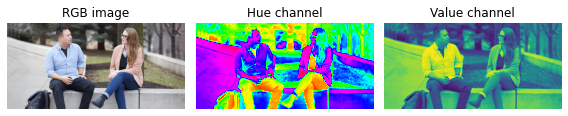

In [354]:
from PIL import Image
import requests
from io import BytesIO

image_processor = ImageProcessor()
url = 'https://ad-management-cdn.yektanet.com/media/items/8370.jpg'
hsv_img = np.array(image_processor.load_img(url))
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

# Comparing the speeds of naive and fast calculate_complexity method:

### naive method:

In [355]:
start = time.time()

img = image_processor.rgb2hsv(image_processor.load_img(url))
complexity =  complexity_estimator.calculate_complexity(img)

end = time.time()
print("operation time = {}".format(end - start))
        

100%|██████████| 136/136 [00:18<00:00,  7.44it/s]

operation time = 18.78650689125061


### fast method:

In [356]:
start = time.time()

img = image_processor.rgb2hsv(image_processor.load_img(url))
complexity =  complexity_estimator.calculate_complexity_fast(img)

end = time.time()
print("operation time = {}".format(end - start))

        

100%|██████████| 9/9 [00:00<00:00,  9.73it/s]


operation time = 3.382923126220703


# Showing the result of complexity estimator algorithm
As you can see, it's working well.

100%|██████████| 20/20 [00:44<00:00,  2.22s/it]

complexity : 0.14883821673814673


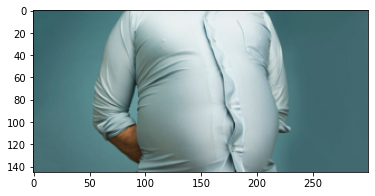

complexity : 0.15004346395838933


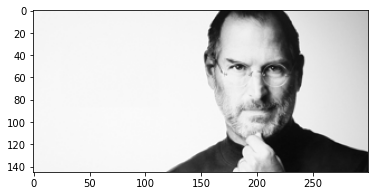

complexity : 0.15795167422917758


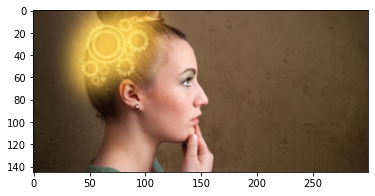

complexity : 0.2081301081678681


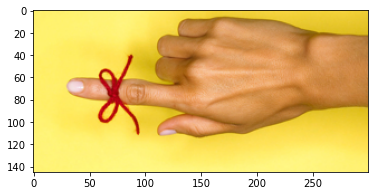

complexity : 0.3079535339463398


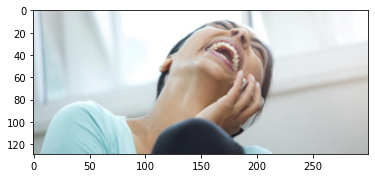

complexity : 0.3126134856485435


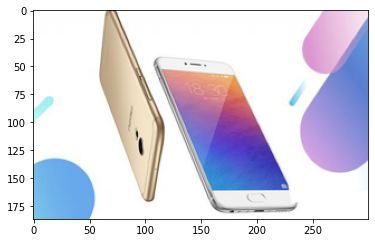

complexity : 0.3325722282006222


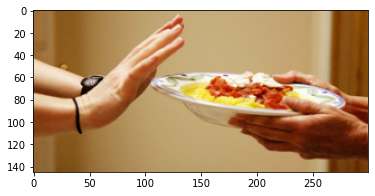

complexity : 0.34422899241789456


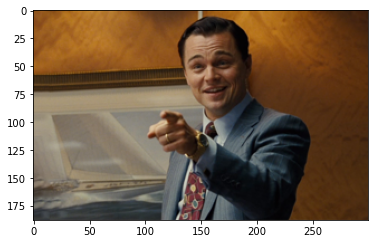

complexity : 0.35543184251828813


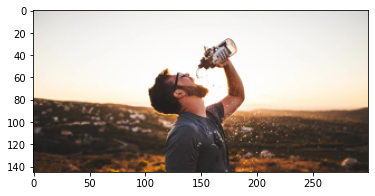

complexity : 0.42465971394846536


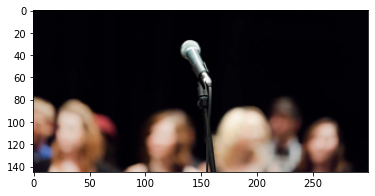

complexity : 0.43213832874036695


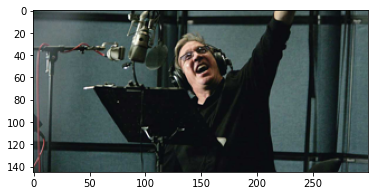

complexity : 0.44985812263842495


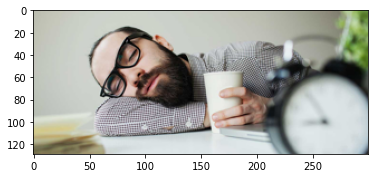

complexity : 0.47304905421405363


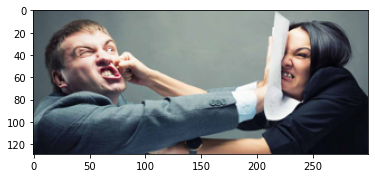

complexity : 0.48652345101025163


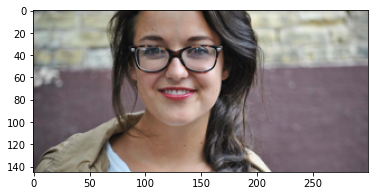

complexity : 0.5443417362451397


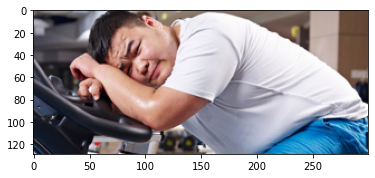

complexity : 0.5700375881713756


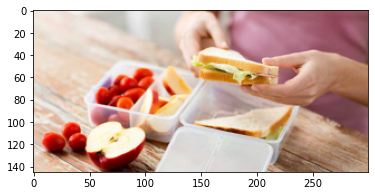

complexity : 0.6208879504383499


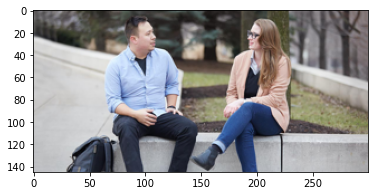

complexity : 0.664763732964601


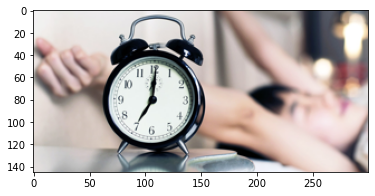

complexity : 0.6707646744544866


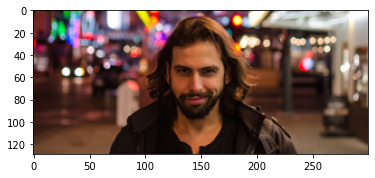

complexity : 0.9075553498114386


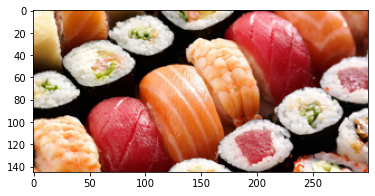

In [365]:
image_processor = ImageProcessor()
complexity_estimator = ComplexityEstimator()

complexities = []
for i in tqdm(ad_df.image_url.unique()[0:20]):
    img = image_processor.load_img(i)
    hsv_img = image_processor.rgb2hsv(img)
    complexities.append([img, complexity_estimator.calculate_complexity_fast(hsv_img)])
 
complexities_df = pd.DataFrame(complexities, columns= ["image", "complexity"])
complexities_df.sort_values(by="complexity", inplace=True)
for i, row in complexities_df.iterrows():
    print("complexity : {}".format(row.complexity))
    plt.imshow(row.image)
    plt.show()




# Using Imagga API for color detection

In [9]:
import pandas as pd
import numpy as np
import cv2 
import os
import requests
from PIL import Image
from io import BytesIO
from skimage.color import rgb2hsv
import skimage
import os.path

class ImageProcessor():
    def __init__(self):
        pass

    def detect_colors(self,image_url,n_clusters=7, extract_overall_color=0):
        api_key = 'acc_e8757fe81b74a32'
        api_secret = 'c7c4aeb4a98bd40704fe023904297ad5'
        response = requests.get(
            'https://api.imagga.com/v2/colors?image_url=%s&separated_count=%s&extract_overall_colors=%s&overall_count=%s' % (image_url, n_clusters, extract_overall_color, n_clusters),
        auth=(api_key, api_secret))
        a = response.json()
        if(a["status"]["type"] == "success"):
            return(a)

    def load_img(self, url):
        response = requests.get(url)
        rgb_img = Image.open(BytesIO(response.content))
        rgb_img.thumbnail((300,300)) #resize pictures to selected maximum values for length and width
        return(rgb_img)
    
    def rgb2hsv(self, img): # reference : https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image
        return(rgb2hsv(np.array(img)))
    
       
class ComplexityEstimator():
    def __init__(self):
        self.batch_size = 30 
        self.i_range, self.j_range = 9,9
        self.gama = 14
        
    def calculate_complexity_by_id(self, id):
        file_name = "ad_images/{}.png".format(id)
        if os.path.exists(file_name):
            img = cv2.imread(file_name)
            complexity = self.calculate_complexity(img)
            return complexity
        else:
            return(None)
        
    def calculate_complexity_fast(self, img):
        #link : https://towardsdatascience.com/one-simple-trick-for-speeding-up-your-python-code-with-numpy-1afc846db418
        
        arr = np.array(img)
        length = arr.shape[0]
        width = arr.shape[1]
        final_arr = []
        window_size = 9

        for i in range(window_size):
            for j in range(window_size):
                new_arr = arr[i:length-window_size+i, j:width-window_size+j,:]
                row = new_arr.reshape((length-window_size)*(width-window_size),3)

                final_arr.append(list(row))
        final_arr = np.array(final_arr)
        final_arr.shape
        c_bar = np.mean(final_arr, axis=0)
        subtracted = np.subtract(final_arr, c_bar)
        squared_subtracted = np.power(subtracted,2)
        euclidean_distance = np.sum(squared_subtracted, axis=2)

        sqrt = np.sqrt(euclidean_distance)
        diff = np.subtract(1,np.exp(-sqrt/14))

        mean_diff = np.mean(diff, axis=0)
        sigma_diff = np.var(diff, axis=0)

        p = np.divide(-np.power(np.subtract(diff,mean_diff),2), np.multiply(2,sigma_diff+0.0000001))
        gw = np.multiply(np.exp(p), diff)
        phi = np.sum(gw, axis= 0)
        complexity = np.mean(phi)

        return(complexity)
        
    def calculate_complexity(self, image): #image is an array with the shape of n*n*3
        # for i in windows:
        #     sum_of(calculate_window_phi)
        window_phi_list = []
        for i in range(image.shape[0]-9):
            for j in range(image.shape[1]-9):
                window = image[i:i+9, j:j+9, :]
                window_phi_list.append(self.calculate_window_phi(window))
        complexity = sum(window_phi_list)/((image.shape[0]-9)*(image.shape[1]-9))
        return(complexity)
        
        
        
    def calculate_window_phi(self, array): # input : 9*9*3 array of each pixel 
        color_differences = []
        window_mean_hue = np.mean(array[:,:,0])
        window_mean_saturation = np.mean(array[:,:,1])
        window_mean_value = np.mean(array[:,:,2])
        window_mean_color = [window_mean_hue, window_mean_saturation, window_mean_value]
        for i in range(array.shape[0]):
            for j in range(array.shape[1]):
                color_differences.append(self.calculate_color_difference(array[i,j], window_mean_color))
        phi = self.calculate_gaussianweighted_sum(color_differences)
        return(phi)
        
    
    def calculate_color_difference(self, point_1, point_2):
        difference = 1 - np.exp(-(self.calculate_euclidean_distance(point_1,point_2)/self.gama))
        return(difference)
    
    def calculate_euclidean_distance(self, point_1, point_2):
        distance = np.sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2 +(point_1[2]-point_2[2])**2)
        return(distance)
    
    def calculate_gaussianweighted_sum(self, array):
        mean = np.mean(array)
        sigma = np.var(array)
        if sigma == 0:
            return(0)
        weighted_array = []
        for a in array:
            weight = np.exp(-((a-mean)**2)/(2*(sigma)))
            weighted_array.append(weight*a)
        return(sum(weighted_array))

    def calculate_batch_complexities(self, ad_df):
        image_processor = ImageProcessor()
        for i, row in ad_df.iterrows():
            url = row.image_url
            imm = image_processor.load_img(url)
            # print(np.array(imm).shape)
            try:
                img = image_processor.rgb2hsv(imm)
                ad_df.loc[i, "complexity"] = self.calculate_complexity_fast(img)
                # print(ad_df.loc[i, "complexity"])
            except:
                # print("error")
                ad_df.loc[i, "complexity"] = 0
        return(ad_df)
            


    def calculate_all_complexities(self, all_ad_df):
        all_ad_df["complexity"] = np.zeros(len(all_ad_df))
        if os.path.exists("labeled_ads.csv"):
            saved_df = pd.read_csv("labeled_ads.csv")
        else: 
            saved_df = pd.DataFrame([], columns=all_ad_df.columns)
        i = len(saved_df)
        while i+100 <len(all_ad_df):
            df = self.calculate_batch_complexities(all_ad_df.iloc[i:i+100, :])
            if os.path.exists("labeled_ads.csv"):
                saved_df = pd.read_csv("labeled_ads.csv", index_col=0)
            else: 
                saved_df = pd.DataFrame([], columns=all_ad_df.columns)
            final_df = saved_df.append(df)
            final_df.to_csv("labeled_ads.csv")


            i+=100

        if i < len(all_ad_df):
            df = self.calculate_batch_complexities(all_ad_df.iloc[i:, :])
            if os.path.exists("labeled_ads.csv"):
                saved_df = pd.read_csv("labeled_ads.csv", index_col=0)
            else: 
                saved_df = pd.DataFrame([], columns=all_ad_df.columns)
            final_df = saved_df.append(df)
            final_df.to_csv("labeled_ads.csv")



        

def main():
    ad_df = pd.read_csv("preprocessed_ad_ctr_df.csv", index_col=0)
    ce = ComplexityEstimator()
    ce.calculate_all_complexities(ad_df)




In [6]:
df_with_complexities = pd.read_csv("labeled_ads.csv", index_col=0)
df_with_complexities.head()

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,complexity
0,48213,۱۰ سایت برتر دانلود رایگان کتاب خارجی (بروز شد),2018-09-06 15:32:11.299022+04:30,https://ad-management-cdn.yektanet.com/media/i...,7731,3156,کتابناک,iranpaper.ir,[],0.000147,0.000000
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001236,0.775030
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000496,0.595961
3,67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000580,0.616051
4,75370,ترجمه تخصصی مقاله فارسی به انگلیسی برای چاپ در...,2019-03-07 14:51:13.641850+03:30,https://ad-management-cdn.yektanet.com/media/i...,16613,6189,ترجمه فارسی به انگلیسی,tarjomic.com,[],0.000525,0.476036


# Extracting Images' Color Features

In [8]:
import pandas as pd 
import requests
import numpy as np
import os
import json
import requests
from PIL import Image
from io import BytesIO


class ApiHandler():
    def __init__(self, n_clusters=7, extract_overall_color=1 ):
        self.imagga_info = pd.read_csv("imagga_info.csv")
        self.api_account_no = 10
        self.api_key = self.imagga_info.iloc[self.api_account_no,0]
        self.api_secret = self.imagga_info.iloc[self.api_account_no,1]
        self.n_clusters = n_clusters
        self.extract_overall_color = extract_overall_color
        self.end_flag = False

#     def load_img(self, url):
#         response = requests.get(url)
#         rgb_img = Image.open(BytesIO(response.content))
#         rgb_img.thumbnail((500,500)) #resize pictures to selected maximum values for length and width
#         return(rgb_img)

    def detect_colors(self,image_url):
        n_clusters = 5
        extract_overall_color = 1
        response = requests.get(
            'https://api.imagga.com/v2/colors?image_url=%s&separated_count=%s&extract_overall_colors=%s&overall_count=%s' % (image_url, n_clusters, extract_overall_color, extract_overall_color),
        auth=(self.api_key, self.api_secret))
        result = response.json()
        if "have reached" in result["status"]["text"]:
            self.api_account_no += 1 
            
            self.api_key = self.imagga_info.iloc[self.api_account_no,0]
            self.api_secret = self.imagga_info.iloc[self.api_account_no,1]
            if self.api_account_no > 19:
                self.end_flag = True
    
        return(result)

#     def upload_to_imagga(self, name, url):
#         img = self.load_img(url)
#         file_name = "images/{}.jpg".format(name)
#         img.save(file_name)

#         response1 = requests.post(
#             'https://api.imagga.com/v2/uploads',
#             auth=(self.api_key, self.api_secret),
#             files={'image': open(file_name, 'rb')})
#         result1 = response1.json()
#         id = result1["result"]["upload_id"]
#         return(id)
    
    def get_batch_imagga(self, main_ad_df): #the length of batch is 100
        ad_df = main_ad_df.copy()
        for i, row in ad_df.iterrows():
            if ad_df.loc[i,"complexity"] == 0 :
                ad_df.loc[i, "imagga_result"] = 0
            else:
                try:
                    result = self.detect_colors(row.image_url)
                    ad_df.loc[i, "imagga_result"] = json.dumps(result)

                except:
                    ad_df.loc[i, "imagga_result"] = 0
        return(ad_df)

def main():
    ad_df = pd.read_csv("labeled_ads.csv", index_col=0)
    ad_df["imagga_result"] = np.zeros(len(ad_df))
    api_handler = ApiHandler()

    if os.path.exists("imagga_done.csv"):
        saved_df = pd.read_csv("imagga_done.csv",index_col=0)
    else: 
        saved_df = pd.DataFrame([], columns=ad_df.columns)
        
    i = len(saved_df)
    batch_size = 100
    while i+batch_size <len(ad_df): #batch size is 30 

        if api_handler.end_flag:
            break

        df = api_handler.get_batch_imagga(ad_df.iloc[i:i+batch_size, :])
        if os.path.exists("imagga_done.csv"):
            saved_df = pd.read_csv("imagga_done.csv", index_col=0)
        else: 
            saved_df = pd.DataFrame([], columns=ad_df.columns)
        final_df = saved_df.append(df)
        final_df.to_csv("imagga_done.csv")


        i+=batch_size


    return(True)




In [8]:
df_with_color_features = pd.read_csv("imagga_done.csv", index_col=0)
df_with_color_features

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,complexity,imagga_result
0,48213,۱۰ سایت برتر دانلود رایگان کتاب خارجی (بروز شد),2018-09-06 15:32:11.299022+04:30,https://ad-management-cdn.yektanet.com/media/i...,7731,3156,کتابناک,iranpaper.ir,[],0.000147,0.000000,0.0
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001236,0.775030,"{""result"": {""colors"": {""background_colors"": [{..."
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000496,0.595961,"{""result"": {""colors"": {""background_colors"": [{..."
3,67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000580,0.616051,"{""result"": {""colors"": {""background_colors"": [{..."
4,75370,ترجمه تخصصی مقاله فارسی به انگلیسی برای چاپ در...,2019-03-07 14:51:13.641850+03:30,https://ad-management-cdn.yektanet.com/media/i...,16613,6189,ترجمه فارسی به انگلیسی,tarjomic.com,[],0.000525,0.476036,"{""result"": {""colors"": {""background_colors"": [{..."
...,...,...,...,...,...,...,...,...,...,...,...,...
23645,610871,زانو درد داری؟! به هیچ وجه جراحی نکن | درمان ف...,2022-06-27 17:48:04.313526+04:30,https://ad-management-cdn.yektanet.com/media/i...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,[3],0.000242,0.531014,0.0
23646,610872,در یک ساعت زانودرد خود را درمان کنید! «بدون نی...,2022-06-27 17:48:23.538661+04:30,https://ad-management-cdn.yektanet.com/media/a...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,[3],0.000263,0.278908,0.0
23647,610873,"معجزه درمان ""دردهای زانو"" با تکنولوژی روز اروپ...",2022-06-27 17:49:14.399044+04:30,https://ad-management-cdn.yektanet.com/media/a...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,"[3, 5, 101]",0.000375,0.219211,0.0
23648,610874,"پایان ""دردهای زانو"" با معجزه زانوبند فرانسوی ا...",2022-06-27 17:49:14.487441+04:30,https://ad-management-cdn.yektanet.com/media/a...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,[],0.000247,0.345444,0.0


###### Adding Ads' Categories

In [582]:
class AdAnalyzer():
       
    item_keywords = {
        1: {
            'دیجیتال مارکتینگ', 'برند ', 'کسبوکار', 'کسب و کار', 'کسب وکار', 'کسبو کار', 'تجارت', 'سرمایه', 'ثبت آگهی',
        'استارتاپ', 'استارت آپ', 'استارت‍آپ', 'seo', 'سئو'
             },    
        108: {
               
             },

        6: {'بلیط' , 'هواپیما' , 'هتل' , ' تور ' , 'مبله' , 'moble' , ' بلیت ' , 'snapptrip' , 'chamedoon' , 'tikban' ,
            'irancharter' , 'mrticket' , 'flightio' , 'charter' , 'adibian724' , '3click' , 'trip' , 'jimbo' , 'blitinja' ,
            'jajiga' , 'lastsecond' , 'گردشگری' , 'villarabet' , 'پرواز' , 'flytoday' , 'سفرنامه' , 'wego' , 'توریست' ,
            'tour' , 'hamgardi' , 'مهمانپذیر' , 'اقامتگاه' 
           },

        8: {'گردو',  'غذاساز', 'بادام', 'پنکیک', 'برنج', 'انجیر', 'زرشک' , 'پذیرایی' ,  
            'لوازم خانگی', 'آشپزخانه' , 'یخچال', ' مبل ', ' فرش ', ' زعفران ', ' کتری ', 'مرغ تازه', 'ظروف', ' کیک ',
            'کیکها', 'جارو برقی', 'میوه', 'سبزیجات', 'گوشتکوب', 'گوشت کوب', 'زودپز', 'زود پز' , 'کوسن' , 'مبلمان' ,
            'آلبالو', 'فرنچ پرس' , 'شیرینی', 'خامه', 'قنادی', ' کیکها ', 'آجیل' , 'پسته', 'گردو',
            'پودینگ' , ' گوشت ' , ' مرغ ' , 'سرویس بهداشتی' , 'مغز گردو' , 'غذاخوری' , 'آشپز' , ' تابه ' , 'کالای خواب' , 
            'پرتقال', 'cake', 'cheftools', 'چاشنی', 'ظرفشویی' , 'سماور' , ' میز ', 'امرسان' , 'کباب پز' , 'تلویزیون' , 
            'دکوراسیون', 'ادویه', 'قاشق', 'چنگال', 'ظروف', 'قابلمه', 'ماهیتابه', 'روتختی', 'شوینده', 'کابینت' ,
            'لیوان', 'کاسه', 'آجیل خوری', 'چاقو', ' رنده ', 'میوه خوری', 'بستنی خوری', ' استیل', 'صابون' , 'موکت',
            'آینه', 
            'آباژور', 'دستمال', 'خوشخواب', ' پتو', 'ملحفه', 'یخچال', 'لباسشویی', 'اجاق', 'نخود', 'عدس', 'لوبیا', 'کفگیر',
            'ملاقه', 'حبوبات', 'چای ساز', 'قهوه ساز', 'آبمیوه گیری', 'آسیاب', 'مخلوط کن', 'غذا ساز', 'مایکروفر',
            'مایکروویو', 'ماکروفر', 'ماکروویو', 'سولاریوم', ' هود ', 'زودپز', 'آرام پز', 'همزن برقی', 'جاروبرقی',
            'جارو شارژی', 'تستر', 'توستر', 'فر برقی', 'لپه', ' دسر ', ' پرده ', 'homeplus', 'khanevade', 'mahtabhome',
            'gilankesht', 'hometexshop', 'bazargam', 'rhtabiat', 'jooyashop', ' عسل ', 'ahoota', 'beenous', 'sidagol' ,
            'چینی زرین' , 'daewoo' , 'اسنوا' , 
            },

        3: {'درمان', 'گیاهی', 'دندان', 'سیگار', ' طبی ', 'موی سفید', 'ضدآفتاب', 'ضد آفتاب', 'امگا3', 'دارو', 'ایمپلنت',
            'ویروس', 'بهداشت', 'درد زانو', 'آرتروز' , 'ارتروز' , 'موهای سفید', 'رفلاکس', 'تیروئید', 'فشارخون', 'فشار خون',
            'میگرن', 'دیابت', 'قاعدگی' , 'سرطان', 'تناسب اندام', 'میخچه', 'روانشناس', 'افسردگی', 'زانودرد',
            'زانو درد'  , 'پوسیده' , 'سینوزیت', 'عمل بینی' ,
            'اعتماد به نفس', 'لاپاراسکوپی', 'سلامت', 'ارتودنسی', 'محلول', 'سرویس خواب', 'iranianteb', 'طب سنتی',
            'karenpharma', 'بوتاکس', 'کبد', 'ریزش مو' ,
            'tavanhub', 'mrehya', 'گلوکز', 'قند خون', 'چربی خون', 'beenous', 'عسل طبیعی', 'ahoota',
            'سیستم ایمنی', 'لیزر' , 'ریزش' , 'پزشک' ,
            'sidagol', 'فشارسنج', 'فشار سنج' , ' معده ' , ' روده ' , 'رفلاکس'},

        4: {' لک‌', ' جوش‌', ' لکه ', 'صورت', 'ضد آفتاب', 'ضدآفتاب', 'ریزش مو',
            'میریزه', 'می‌ریزه', 'می ریزه' , 'مراقبت از مو', 'کاشت ابرو',
            'زیبایی', 'آرایش', 'رژلب', 'رژ لب', 'خط چشم', 'پوستی', 'مژه', 'شامپو', 'ابرو', 'جوانسازی',
            'ناخن', 'کراتینه', 'زنانه', 'گودی' , 'بوتاکس', 'لنز طبی' , 'لنزهای طبی' , 'لنز رنگی' , 'لنزهای رنگی' ,
            'دکلره', 'آبرسان', 'تیرگی زیر بغل', 'جوش سرسیاه', 'لک های صورت', 'آکنه', 'چین و چروک', 'موخوره', 'مرطوب کننده',
            'اگزما', 'ژوت' , ' لب ' , 'خوشبو کننده' , 'بدلیجات' , 'رنگ مو' , ' لاک ' , 'لوسیون' , 'zanoone' ,
            'ماسک مو', 'آلوورا', ' خارش ', 'نرم کننده', 'التهاب', 'پاکسازی پوست', 'میکرونیدلینگ', 'جوان سازی',
            'میکروبلیدینگ', 'فیبروز', 'هاشور ابرو', 'لایه برداری', 'موهای خشک', 'موهای چرب', 'ضد آفتاب', 'لکه‌ها',
            'ماسک صورت', 'سشوار' , 'بایودرما' , 'عطرهای', 'rojashop' , 'کامان' , 'آدرا' , 'کانسیلر' , 
            'لیزر پوست', 'بوتاکس', 'کلاژن', 'اسکراب', 'وازلین', 'روغن نارگیل', 'ویتامین آ', 'روغن بادام',
            'دور چشم','ترمیم‌کننده', 'ضد چروک', 'چروک صورت', 'خط لبخند', 'زنانه' , 'لیزر', 'صاف' ,  'اتو مو' ,

            },

        22: {         
            'مانتو', ' شال ', 'روسری', 'سارافن', 'سارافون', 'اورآل', 'پالتو', 'توربان', 'قواره بزرگ', 'بارانی',
            'شلوار راسته', 'مام استایل', 'شومیز', 'یقه اسکی', 'یقه هفت', 'کمر کش', 'بالاتنه', 'مجلسی', 'سنگدوزی',
            'نیم بوت', 'پاشنه بلند', 'بانی‌مد', 'banimode',
            'پلاس سایز', 'اور سایز', 'دامن ', 'چین دار', 'اکسسوری', 'پوشاک', 'کیف دستی', 'کیف کمری',
            'کیف مجلسی', 'یقه ایستاده', 'فری سایز', 'آستین بلند', 'آستین کوتاه','فاق بلند', 'فاق کوتاه', 'کبریتی',
            'مچ دار', 'برمودا', 'کرکی' , 'ویسکوز', 'مخمل', ' تاپ مجلسی', 'یقه قایقی', 'یقه انگلیسی', 'کنفی '
        },

        5: {'گوشی', 'لپتاپ','تبلت' , 'ال سی دی', 'ال ای دی', 'فتوشاپ', 'فوتوشاپ', 'ترابایت', 'هارد دیسک', 'LCD',
            'LED', 'سامسونگ', 'شیائومی', 'PS4', 'هدفون', 'بروزرسانی',
            'به روز رسانی', 'به روزرسانی', 'مایکروسافت', 'فلش مموری', 'شارژر', 'اسپیکر', 'بلوتوث', 'تریلر',
            'پلی استیشن', 'xbox', 'میکروفون', 'مودم', 'آیفون', 'سرفیس', 'mobogift' 'anargift' , 'استیم',
            'پاوربانک' , 'مموری' , 'لپ‌تاپ' , 'ایرپاد' , 'Galaxy' , 'tacharait' , 'iPhone' , 'lipak' ,'لنوو' , 'کیبورد' ,
            'pardispazar' , 'مانیتور' , 'ماوس' , 'کارت گرافیک' , 'msi' , 'موس ' , 'تکنولوژی' , 'PlayStation' , 'گیمر' ,
            'گیمینگ' , 'گیفت کارت' , 'igame' , 'jahanbazar' , 'Plazadigital' , 'surfaceiran' , 'echotel' , 'SAMSUNG' ,
            'هواوی' , 'ساعت هوشمند' , 'ایسوس' , 'مادربرد' , 'پابحی' , 'هدست' , ' AI ' , 'SQL' , 'اسمارت واچ' , 'sedastore',
            'اسپاتیفای' , 'BlockChain' , 'Xiaomi'  , 'zula' , 'plaza' ,'iranhost' , 'shetabhost' , 'mehost' , 'pars.host' , 'iranspeed' , 'jobihost' , 'maralhost' , 'لینوکس' ,

           },

        110: {
            'سلبریتی', 'فلور نظری', 'نفیسه روشن', 'نوید محمد زاده', 'گلاره عباسی',
            'بازیگر', 'تماشاخونه', 'شفیعی جم', 'پریناز ایزدیار', 'شهاب حسینی', 'سحر دولتشاهی',
            'سریال آقازاده', 'فلور نظری', 'تماشا کن', 'حامد بهداد', 'سینما', 'سریال', 'هنرپیشه', 'فیلیمو'
          },

        0: {
            'لاستیک', 'خودرو', 'خلافی', 'عوارضی', 'سایپا', 'جریمه', 'کارواش', 'ترافیک', 'ام وی ام' , 'mashinno' , 'karnameh' ,
            'راهنمایی و رانندگی', 'زوج و فرد', 'مزدا۳', 'پراید', 'car' , 'کیلومتر' , 'hammpa' , 'لوازم یدکی' , 'بنزین','BMW'
           },
        9: {
            'پول پارو کن', 'پولدار', 'درآمد دلاری', 'بی پولی', 'پول دربیار', 'میلیونر', 'میلیاردر', 'درآمدت رو',
         'درآمدت دلاری', 'سود کن', 'پول در بیار', 'کسب درآمد','لاتاری', 'ثروتمند','درآمد کسب', 'پول داشته باش', 'قرعه کشی', 'جایزه', 'قرعه‌کشی','جوایز'
        },

        101: { 'کانادا', 'اروپا', 'آیلتس', 'تافل', 'اپلای','ویزا' , 'اقامت دائم' , ' پاسپورت' , 
              'TOEFL' , 'IELTS' , 'visa' , 'مهاجرت' , 'gosafir' , 'زبان انگلیسی' , 'زبان آلمانی' , 'شهروند' ,
              'زبان فرانسه' ,
             },

        102: {'استخدام'} ,

        16: {
             'بارسلونا' , 'یوونتوس' , 'پرسپولیس' , 'استقلال' , 'کتونی' , 'ورزشی' , 'sportjameh' , 'من سیتی' , 'مایوهای' ,
             'لیورپول' ,  'gishasport' , 'فوتبال' , 'کاترپیلار' , 'نایک' , 'پیاده روی' , 'ferzsport' , 'آدیداس' , 'سویشرت' ,
             'ورزشکاران' , 'تیم ملی' , 'sherafit' , 'لالیگا' , 'پینگ پنگ' ,
            },

        17: {'کارتون', 'اسباب‌بازی', 'اسباب بازی', 'کودک', 'نوزاد', 'فرزند', 'بچه', 'انیمیشن', 'بچتون',
             'زایمان', 'حاملگی', 'بارداری', 'حامله', 'نی نی', 'پوشک', 'سیسمونی' , 'ninibaba' , 'baby' , 'بچه گانه' , 'شیر مادر',
             'پیش دبستانی' , 'koodak' , 'تربیت' , ' باردار' , 'کمبود شیر' , 'ماشین شارژی' , 'hyperbox' , 'chichilas' , 'عروسک' ,
             'bazidone' , 'پمپرز' , 'مولفیکس' , ' لگو' , 'بچگانه' ,
            },

        18: { 'صاحب خانه' , ' ملک ' , 'ملکی' , ' زمین '  , 'خرید ویلا' , 'صاحب‌خانه'
            },

        19: {'ارز دیجیتال', 'coinnik', 'tetherland' , 'bit24.cash' ,'arzwall' ,'bitrah', 'رمزارز', 'تتر' , 'کریپتو','بیت کوین'
            ,'بیتکوین','بیت‌کوین','اتریوم','ارزهای', 'arzypto' ,'exnance','ramzinex'},

        20: { 'sahambin' , 'savbroker', 'namademan', 'kiandigital',  'kasbesud', 'forexchargeiran',
             'exnovin.io', 'farabi.co', 'iranjess', 'halakoei', 'sarmaye', 'agah-brokerage', 
             'naabbusiness', 'fibonu', 'ivest.ir', 'ariomex' , 'کارگزاری' , 'صندوق' , 'سرمایه', 'farabixo', 'بورس',
             'فارکس','سهام',
        },

        100: {
            'کنکور' , 'گاج', 'ریاضی', 'جمع بندی' , 'زیست' , ' تجربی' , 'هندسه' , 'حسابان' , 'نکته و تست' , 'مشاور تحصیلی',
            'رتبه کنکور' , 'tamland' , 'onlineacademy' , 'جمع‌بندی' , 'classino' 
        },

        107: {
            'نصب',
        },

        10 : {
            ' حسینیه' , 'مذهبی' , 'روضه' , 'مداح' , ' محرم ' , ' وصیت' , 'revayat' , 'قرآن' , 'قاسم سلیمانی' , 'بهجت' ,
            'حرز ' , 'امام جواد ' , 'sharafonline' , 'امام محمّد باقر' , 'شهدا' , 'چشم زخم' , ' عبا ' , 'چشم‌زخم' ,
            'امام رضا' , ' شیعه' ,'شیعیان'  , 'پیامبر' , 'زیارت' , 'اندیشمند اسلامی' , 'وهابیون' , 'وهابیت' , 'عاشورا' , 
        },

        105 : {
               'iranhost' , 'shetabhost' , 'mehost' , 'pars.host' , 'iranspeed' , 'jobihost' , 'maralhost' , 'لینوکس' ,
        },

        109: {
              'دانش‌آموز' , 'دانش آموز' , 'دبستان' , 'تیزهوشان' , 'paresh' ,  
        },

    }

    item_without = {
        20 : {'ارز دیجیتال'},
        6 : {'اقامتگاه ابدی'},

        3 : {'آنتی ویروس' , 'سلامت ماشین' ,},

        4 : {'صورت تخصصی' , 'صورت آنلاین' , },

        100: {'محیط زیست' , },

        5 : {'اسباب‌بازی' , 'اسباب بازی' },

        17: {'سیبچه'},

        0 : {'card' , 'carpet' , 'care'},
    } 
    
    def label_all_ads(self, ad_df):
        result = ad_df.copy()
        result["ad_category"] = result.apply(lambda row : self.detect_category(row["title"], row["campaign_title"], row["advertiser_name"]),axis=1)
        return result
    
    def detect_category(self,title, campaign_title, advertiser_name):
    #     title = str(row['title'])
    #     campaign_title = str(row['campaign_title'])
    #     advertiser_name = str(row['advertiser_name'])
        ret = []
        for cat, keywords in AdAnalyzer.item_keywords.items():
            is_contain_without = False
            related_keyword = None
            for keyword in keywords:
                if (title and keyword in title) or (campaign_title and keyword in campaign_title) \
                        or (advertiser_name and keyword in advertiser_name):
                    if cat in AdAnalyzer.item_without.keys():
                        without_keywords = AdAnalyzer.item_without[cat]
                        for without_keyword in without_keywords:
                            if (title and without_keyword in title) or (campaign_title and without_keyword in campaign_title) \
                                    or (advertiser_name and without_keyword in advertiser_name):
                                is_contain_without = True
                                break
                    if not is_contain_without:
                        ret.append(cat)        
                    break
        return ret

    def simple_detect_category(self,title):
    #     title = str(row['title'])
    #     campaign_title = str(row['campaign_title'])
    #     advertiser_name = str(row['advertiser_name'])
        ret = []
        for cat, keywords in AdAnalyzer.item_keywords.items():
            is_contain_without = False
            related_keyword = None
            for keyword in keywords:
                if (title and keyword in title):
                    if cat in AdAnalyzer.item_without.keys():
                        without_keywords = AdAnalyzer.item_without[cat]
                        for without_keyword in without_keywords:
                            if (title and without_keyword in title):
                                is_contain_without = True
                                break
                    if not is_contain_without:
                        ret.append(cat)        
                    break
        return ret

In [580]:
ad_analyzer = AdAnalyzer()

In [581]:
df_with_cats = ad_analyzer.label_all_ads(final_ad_ctr_df)

Index(['id', 'title', 'created', 'image_url', 'campaign_id', 'advertiser_id',
       'campaign_title', 'advertiser_name', 'cats', 'ctr'],
      dtype='object')


In [583]:
df_with_cats

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,ad_category
0,48213,۱۰ سایت برتر دانلود رایگان کتاب خارجی (بروز شد),2018-09-06 15:32:11.299022+04:30,https://ad-management-cdn.yektanet.com/media/i...,7731,3156,کتابناک,iranpaper.ir,[],0.000179,[]
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001507,[8]
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000604,[8]
3,67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000707,[8]
4,75370,ترجمه تخصصی مقاله فارسی به انگلیسی برای چاپ در...,2019-03-07 14:51:13.641850+03:30,https://ad-management-cdn.yektanet.com/media/i...,16613,6189,ترجمه فارسی به انگلیسی,tarjomic.com,[],0.000639,[]
...,...,...,...,...,...,...,...,...,...,...,...
23734,611015,فروش خودرو کارکرده خود را به خودرو45 بسپارید!!...,2022-06-27 19:55:48.101127+04:30,https://ad-management-cdn.yektanet.com/media/a...,171875,3019,native-kw-khodro-d,khodro45.com,[0],0.000937,[0]
23735,611025,خرید خودرو با خیال راحت در خودرو 45 | تایید سل...,2022-06-27 19:55:48.227737+04:30,https://ad-management-cdn.yektanet.com/media/a...,173821,3019,native-retargeting-step2-all,khodro45.com,[0],0.000237,[0]
23736,611027,خودرو خود را با قیمت همین امروز بفروشید!! قیمت...,2022-06-27 19:55:48.282911+04:30,https://ad-management-cdn.yektanet.com/media/a...,127597,3019,N-contextual-eghtesadi,khodro45.com,[0],0.000591,[0]
23737,611043,9 دلیل هوشمندانه، برای انتخاب دکتر شیبانی نیا،...,2022-06-27 22:23:45.196076+04:30,https://ad-management-cdn.yektanet.com/media/a...,212516,60254,کلید واژه - آیفون,sheibaninia.net,"[3, 5, 17]",0.001168,"[3, 5, 17]"


In [584]:
df_with_cats[df_with_cats["ad_category"].apply(lambda x: len(x) >0)]

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,ad_category
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001507,[8]
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000604,[8]
3,67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000707,[8]
8,82646,ایمپلنت کره ای ۳،۸۰۰،۰۰۰ (فوری و دیجیتالی),2019-05-11 11:49:00.195812+04:30,https://ad-management-cdn.yektanet.com/media/i...,19746,7058,کمپین اصلی ایمپلنت,clinic-gharb.ir,[3],0.001644,[3]
13,88495,خرید بهترین و ارزان ترین گوشی های موبایل,2019-06-24 10:27:07.763324+04:30,https://ad-management-cdn.yektanet.com/media/i...,22332,7931,کمپین همسان,edbazar.com,[5],0.000072,[5]
...,...,...,...,...,...,...,...,...,...,...,...
23708,610968,تخفیفات فوق ویژه محصولات الکترواستیل را از جیم...,2022-06-27 19:40:21.307285+04:30,https://ad-management-cdn.yektanet.com/media/a...,214028,11745,محصولات جیمبوشاپ,jimboshop.ir,[6],0.001087,[6]
23734,611015,فروش خودرو کارکرده خود را به خودرو45 بسپارید!!...,2022-06-27 19:55:48.101127+04:30,https://ad-management-cdn.yektanet.com/media/a...,171875,3019,native-kw-khodro-d,khodro45.com,[0],0.000937,[0]
23735,611025,خرید خودرو با خیال راحت در خودرو 45 | تایید سل...,2022-06-27 19:55:48.227737+04:30,https://ad-management-cdn.yektanet.com/media/a...,173821,3019,native-retargeting-step2-all,khodro45.com,[0],0.000237,[0]
23736,611027,خودرو خود را با قیمت همین امروز بفروشید!! قیمت...,2022-06-27 19:55:48.282911+04:30,https://ad-management-cdn.yektanet.com/media/a...,127597,3019,N-contextual-eghtesadi,khodro45.com,[0],0.000591,[0]


In [588]:
# saving the dataframe
df_with_cats.to_csv("normal_ad_df_with_cats.csv")

# Checking Color Distribution of a Category

In [17]:
import json
from PIL import ImageColor
import colorsys
import seaborn
import pandas as pd
from tqdm import tqdm

In [18]:
df = pd.read_csv("training_set.csv", index_col=0)

In [19]:
df.columns

Index(['background_h_0', 'background_s_0', 'background_v_0',
       'background_percent_0', 'background_h_1', 'background_s_1',
       'background_v_1', 'background_percent_1', 'background_h_2',
       'background_s_2', 'background_v_2', 'background_percent_2',
       'foreground_h_0', 'foreground_s_0', 'foreground_v_0',
       'foreground_percent_0', 'foreground_h_1', 'foreground_s_1',
       'foreground_v_1', 'foreground_percent_1', 'foreground_h_2',
       'foreground_s_2', 'foreground_v_2', 'foreground_percent_2',
       'object_percent', 'complexity', 'cat_0', 'cat_102', 'cat_3', 'cat_4',
       'cat_5', 'cat_6', 'cat_101', 'cat_8', 'cat_100', 'cat_10', 'cat_105',
       'cat_108', 'cat_107', 'cat_109', 'cat_110', 'cat_16', 'cat_17',
       'cat_18', 'cat_unknown', 'ctr'],
      dtype='object')

In [70]:
cooking_df = df[df.cat_8 == 1].sort_values(by="ctr", ascending=False)
travel_df = df[df.cat_6 == 1].sort_values(by="ctr", ascending=False)
beauty_df = df[df.cat_4 ==1].sort_values(by="ctr", ascending=False)

In [71]:
all_bg_colors = []
for i, row in cooking_df.iloc[0:200, :].iterrows():
    for rep in range(int(row.background_percent_0 // 0.1)):
        all_bg_colors.append([row.background_h_0, row.background_s_0, row.background_v_0, "cooking"])
for i, row in travel_df.iloc[0:200, :].iterrows():
    for rep in range(int(row.background_percent_0 // 0.1)):
        all_bg_colors.append([row.background_h_0, row.background_s_0, row.background_v_0, "travel"])
for i, row in beauty_df.iloc[0:200, :].iterrows():
    for rep in range(int(row.background_percent_0 // 0.1)):
        all_bg_colors.append([row.background_h_0, row.background_s_0, row.background_v_0, "beauty"])

In [72]:
bg_colors_df = pd.DataFrame(all_bg_colors, columns= ["hue","saturation","value", "category"])

In [73]:
bg_colors_df

,hue,saturation,value,category
0,0.550384,0.232558,0.082609,cooking
1,0.055594,0.026432,0.882609,cooking
2,0.055594,0.026432,0.882609,cooking
3,0.055594,0.026432,0.882609,cooking
4,0.121297,0.211538,0.121739,cooking
...,...,...,...,...
2342,0.000000,0.000000,1.000000,beauty
2343,0.000000,0.000000,1.000000,beauty
2344,0.000000,0.000000,1.000000,beauty
2345,0.000000,0.000000,1.000000,beauty


<AxesSubplot:xlabel='hue', ylabel='Density'>

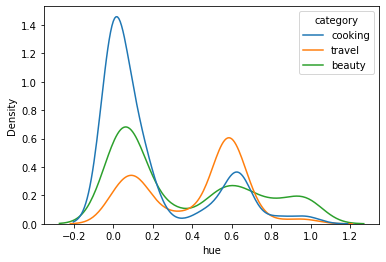

In [74]:
seaborn.kdeplot(data=bg_colors_df, x="hue", hue="category")

<AxesSubplot:xlabel='saturation', ylabel='Density'>

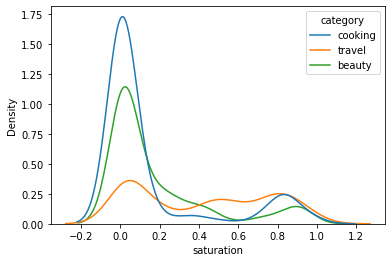

In [75]:
seaborn.kdeplot(data=bg_colors_df, x="saturation", hue="category")

<AxesSubplot:xlabel='value', ylabel='Density'>

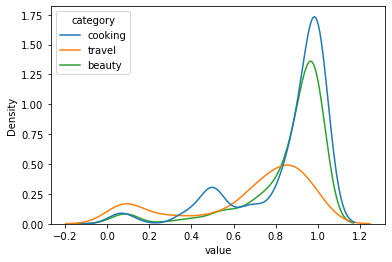

In [76]:
seaborn.kdeplot(data=bg_colors_df, x="value", hue="category")

# Checking Impact of Complexity on CTR

In [700]:
cooking_cat_df

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,ad_category
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001507,[8]
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000604,[8]
3,67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000707,[8]
60,134963,علت روشن نماندن شعله فر اجاق گاز چیست؟,2020-03-09 15:06:57.449379+03:30,https://ad-management-cdn.yektanet.com/media/i...,41846,4332,لوازم خانه - اسفند98,a4baz.com,[8],0.000423,[8]
61,134981,دلیل کپک زدن ماشین لباسشویی چیست؟,2020-03-09 15:47:36.404534+03:30,https://ad-management-cdn.yektanet.com/media/i...,41846,4332,لوازم خانه - اسفند98,a4baz.com,[8],0.001052,[8]
...,...,...,...,...,...,...,...,...,...,...,...
23653,610835,از به‌روزمارت آنلاین بخر ، \r\nسرد و تازه رایگ...,2022-06-27 16:59:32.436193+04:30,https://ad-management-cdn.yektanet.com/media/a...,213971,21308,ماشین یخچالدار-دسکتاپ-همسان عادی,beroozresaan.com,[8],0.000322,[8]
23656,610838,از به‌روزمارت آنلاین بخر ، \r\nسرد و تازه رایگ...,2022-06-27 17:04:21.590900+04:30,https://ad-management-cdn.yektanet.com/media/a...,213984,21308,ماشین یخچالدار-موبایل-همسان عادی,beroozresaan.com,[8],0.000627,[8]
23658,610840,از به‌روزمارت آنلاین بخر ، \r\nسرد و تازه رایگ...,2022-06-27 17:11:44.803073+04:30,https://ad-management-cdn.yektanet.com/media/a...,213989,21308,ماشین یخچالدار-تمام کاربران سایت-همسان ریتارگتینگ,beroozresaan.com,[8],0.000415,[8]
23696,610906,دوست داری آشپزخانه‌ت چه شکلی باشه؟قبل از خرید،...,2022-06-27 18:03:34.244911+04:30,https://ad-management-cdn.yektanet.com/media/a...,214014,59801,نیتیو استیل البرز,daarvag.com,[8],0.000834,[8]


In [ ]:
complexity_estimator = ComplexityEstimator()

In [709]:
cooking_cat_df.iloc[0]["image_url"]

'https://ad-management-cdn.yektanet.com/media/items/photo_2019-01-08_15-22-36.jpg'

In [731]:
sample = df_with_cats.sample(200)

In [732]:
sample["complexity"] = np.zeros(len(sample))


for i in tqdm(sample.index):
    try:
        url = sample.loc[i,"image_url"]
        img = image_processor.load_img(url)
        hsv_img = image_processor.rgb2hsv(img)
        complexity = complexity_estimator.calculate_complexity_fast(hsv_img)
        sample.loc[i, "complexity"] = complexity
    except:
        pass



100%|██████████| 200/200 [10:16<00:00,  3.08s/it]


In [734]:
print(sample["ctr"].corr(sample["complexity"]))

-0.013909282001098044


(array([25.,  0.,  0.,  1.,  2.,  1.,  2.,  2.,  5.,  5.,  8., 11.,  6.,
         8., 12., 12., 12., 14.,  8., 15., 14.,  7.,  2.,  7.,  5.,  3.,
         0.,  2.,  0.,  0.,  3.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,
         1.]),
 array([0.        , 0.02972799, 0.05945597, 0.08918396, 0.11891195,
        0.14863994, 0.17836792, 0.20809591, 0.2378239 , 0.26755189,
        0.29727987, 0.32700786, 0.35673585, 0.38646383, 0.41619182,
        0.44591981, 0.4756478 , 0.50537578, 0.53510377, 0.56483176,
        0.59455975, 0.62428773, 0.65401572, 0.68374371, 0.7134717 ,
        0.74319968, 0.77292767, 0.80265566, 0.83238364, 0.86211163,
        0.89183962, 0.92156761, 0.95129559, 0.98102358, 1.01075157,
        1.04047956, 1.07020754, 1.09993553, 1.12966352, 1.1593915 ,
        1.18911949]),
 <BarContainer object of 40 artists>)

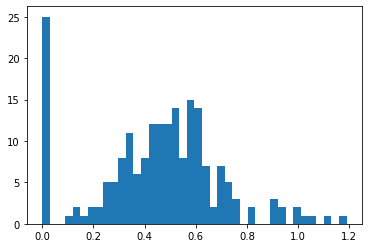

In [733]:
plt.hist(sample.complexity, bins=40)

In [735]:
sample.to_csv("sample_ads_with_complexity.csv")

<AxesSubplot:xlabel='complexity', ylabel='ctr'>

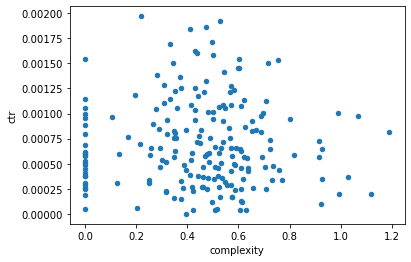

In [738]:
sample.plot.scatter(x = "complexity", y ="ctr")

# Orginizing Features for the Neural Net Model

## Removing Rows with Zero Complexities

In [7]:
import pandas as pd 
final_df = pd.read_csv("imagga_done.csv",index_col=0)
final_df = final_df[final_df.complexity != 0]
final_df.to_csv("final_table.csv")

## SHOULD BE DELETED

In [28]:

adv_analyzer = AdvertiserAnalyzer(final_df)
mean_ctrs = []
for i in final_df.advertiser_id:
    mean_ctrs.append(adv_analyzer.find_adv_mean_ctr(i))


In [29]:
import matplotlib.pyplot as plt

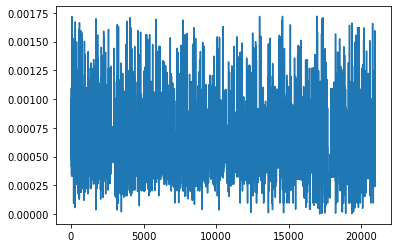

In [30]:
plt.plot(mean_ctrs)

## Normalizing Ads CTRs Based on Advertisers' Mean CTRs

In [19]:
class AdvertiserAnalyzer():
    def __init__(self, ad_df):
        self.ad_df = ad_df
    
    def find_adv_mean_ctr(self, adv_id):
        df = self.ad_df[self.ad_df["advertiser_id"] == adv_id]
        mean_ctr = np.mean(df.ctr)
        return mean_ctr
    
    def count_adv_ads(self, adv_id):
        df = self.ad_df[self.ad_df["advertiser_id"] == adv_id]
        ads_number = len(df.id.unique())
        return(ads_number)
    
    def normalize_all_ctrs(self):
        final_df = self.ad_df.copy()
        final_df["normal_ctr"] = np.zeros(len(final_df))
        advertisers_ctrs = []
        for id in final_df.advertiser_id.unique():
            advertisers_ctrs.append(self.find_adv_mean_ctr(id))

        system_mean_ctr = np.mean(advertisers_ctrs)
        for i,row in final_df.iterrows():
            adv_mean_ctr = self.find_adv_mean_ctr(row.advertiser_id)
            final_df.loc[i, "normal_ctr"] = (row.ctr / adv_mean_ctr) * system_mean_ctr
        return(final_df)

In [20]:
final_df = pd.read_csv("final_table.csv", index_col=0)
adv_analyzer = AdvertiserAnalyzer(final_df)
a = adv_analyzer.normalize_all_ctrs()

In [21]:
a["ctr"] = a["normal_ctr"]
a.drop(columns=["normal_ctr"], inplace= True)

In [23]:
a.head(2)

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,complexity,imagga_result
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001071,0.775030,"{""result"": {""colors"": {""background_colors"": [{..."
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000429,0.595961,"{""result"": {""colors"": {""background_colors"": [{..."


In [76]:
a.to_csv("final_table.csv")

In [4]:
df = pd.read_csv("training_set.csv")

In [6]:
for i in df.columns:
    print(i, len(df[df[i]!=0]))

Unnamed: 0 15102
background_h_0 13445
background_s_0 14080
background_v_0 15100
background_percent_0 15101
background_h_1 14322
background_s_1 14761
background_v_1 15096
background_percent_1 15102
background_h_2 14487
background_s_2 14844
background_v_2 15099
background_percent_2 15102
foreground_h_0 14212
foreground_s_0 14721
foreground_v_0 15102
foreground_percent_0 15099
foreground_h_1 14405
foreground_s_1 14797
foreground_v_1 15101
foreground_percent_1 15101
foreground_h_2 14560
foreground_s_2 14866
foreground_v_2 15101
foreground_percent_2 15102
object_percent 15088
complexity 15102
cat_0 706
cat_102 53
cat_3 1386
cat_4 934
cat_5 809
cat_6 740
cat_101 268
cat_8 613
cat_100 388
cat_10 93
cat_105 53
cat_108 246
cat_107 405
cat_109 194
cat_110 52
cat_16 190
cat_17 465
cat_18 1709
cat_unknown 7191
ctr 15102


### Removing Advertisers with Few Number of Ads

In [63]:
adv_ads_num = []
adv_analyzer = AdvertiserAnalyzer(final_df)

for id in tqdm(final_df.advertiser_id.unique()):
    ads_num = adv_analyzer.count_adv_ads(id)
    adv_ads_num.append([id,ads_num])

100%|██████████| 1805/1805 [00:00<00:00, 2801.99it/s]


In [64]:
adv_ads_num_df = pd.DataFrame(adv_ads_num, columns=["advertiser_id", "ads_num"])

In [74]:
import matplotlib.pyplot as plt
adv_ads_num_df[adv_ads_num_df.ads_num >10].ads_num.sum()

16621

### Detecting Outlier Advertisers Based on CTrs

In [51]:
adv_mean_ctrs = []
adv_analyzer = AdvertiserAnalyzer(final_df)
for id in tqdm(a.advertiser_id.unique()):
    mean_ctr = adv_analyzer.find_adv_mean_ctr(id)
    adv_mean_ctrs.append([id,mean_ctr])

100%|██████████| 1805/1805 [00:00<00:00, 2740.77it/s]


In [52]:
adv_mean_ctrs_df = pd.DataFrame(adv_mean_ctrs, columns=["advertiser_id", "mean_ctr"])

In [53]:
adv_mean_ctrs_df

,advertiser_id,mean_ctr
0,4993,0.000831
1,6189,0.000640
2,7058,0.000868
3,7931,0.000613
4,3527,0.000638
...,...,...
1800,54268,0.000987
1801,57350,0.001122
1802,27232,0.000449
1803,60209,0.001233


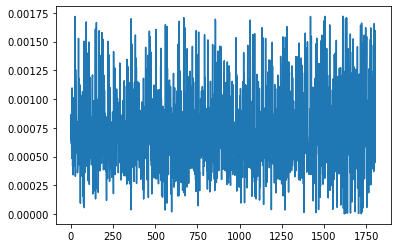

In [54]:
import matplotlib.pyplot as plt
plt.plot(adv_mean_ctrs_df.mean_ctr)

So fortunately there seems to be no outlier advertiser :) 

## Convert Json-Kind Color Features to Seprated Features

In [27]:
import pandas as pd 
final_df = pd.read_csv("final_table.csv",index_col=0)


In [140]:
import skimage
from tqdm import tqdm
class Converter():
    def __init__(self, ad_df):
        self.ad_df = ad_df
        
    def one_hot_encode(self, cats_list, columns):
        result = dict.fromkeys(columns, 0)
        if len(cats_list) == 0:
            result["cat_unknown"] = 1
        else:
            result["cat_unknown"] = 0 
            for i in cats_list:
                result["cat_{}".format(i)] = 1
        return result

    def extract_features(self, json_data):
        dict_data = json.loads(json_data)
        final_features = dict()
        if type(dict_data) == int:
            return("none")
        if 'result' in list(dict_data.keys()):
            for ftype in ["background", "foreground"]:
                for i in range(3):
                    if i> len(dict_data["result"]["colors"]["{}_colors".format(ftype)])-1:
                        final_features["{}_h_{}".format(ftype,i)] =1000
                        final_features["{}_s_{}".format(ftype,i)] =1000
                        final_features["{}_v_{}".format(ftype,i)] =1000
                        final_features["{}_percent_{}".format(ftype, i)] = 1000
                    else: 
                        b = dict_data["result"]["colors"]["{}_colors".format(ftype)][i]['b']
                        g = dict_data["result"]["colors"]["{}_colors".format(ftype)][i]['g']
                        r = dict_data["result"]["colors"]["{}_colors".format(ftype)][i]['r']
                        percent = dict_data["result"]["colors"]["{}_colors".format(ftype)][i]['percent']
                        hsv = skimage.color.rgb2hsv(np.array([r,g,b], dtype=np.uint8))
                        final_features["{}_h_{}".format(ftype,i)] =hsv[0]
                        final_features["{}_s_{}".format(ftype,i)] =hsv[1]
                        final_features["{}_v_{}".format(ftype,i)] =hsv[2]
                        final_features["{}_percent_{}".format(ftype, i)] =percent
            final_features["object_percent"] = dict_data["result"]["colors"]["object_percentage"]
            return(final_features)
        else:
            return("error")
    
    def create_feature_table(self): 
#         columns = ['background_h_0', 'background_s_0', 'background_v_0', 'background_percent_0', 'background_h_1',                    'background_s_1', 'background_v_1', 'background_percent_1', 'background_h_2', 'background_s_2', 'background_v_2',
#                    'background_percent_2', 'foreground_h_0', 'foreground_s_0', 'foreground_v_0', 'foreground_percent_0',
#                    'foreground_h_1', 'foreground_s_1', 'foreground_v_1', 'foreground_percent_1', 'foreground_h_2', 
#                    'foreground_s_2', 'foreground_v_2', 'foreground_percent_2','object_percent']
        all_cats = []
        for j,row1 in self.ad_df.iterrows():
            cat_list = json.loads(row1.cats)
            all_cats.extend(cat_list)
        all_cats = list(set(all_cats))
        cats_columns = ["cat_{}".format(x) for x in all_cats]
        
        final_feature_df = pd.DataFrame([], columns= columns)
        for i, row in tqdm(self.ad_df.iterrows()):
            if row.imagga_result != '0.0':
                features = self.extract_features(row.imagga_result)
                if features != "error" and features != "none":
                    features["complexity"] = row["complexity"]
                    cat_features = self.one_hot_encode(json.loads(row.cats), columns= cats_columns)
                    features.update(cat_features)
                    features["ctr"] = row["ctr"]
                    if len(final_feature_df) == 0:
                        final_feature_df = pd.DataFrame(features, index=[0])
                    else:
                        final_feature_df = final_feature_df.append(features, ignore_index=True)
                    
                
        return(final_feature_df)

In [118]:
convertor = Converter(final_df)
feature_table = convertor.create_feature_table()

20959it [01:35, 220.45it/s]


In [1]:
feature_table.columns

NameError: name 'feature_table' is not defined

In [154]:
feature_table = feature_table[np.logical_and(feature_table.background_h_2!= 1000, feature_table.foreground_h_2!= 1000)]
feature_table.to_csv("training_set.csv")

In [2]:
import pandas as pd

In [31]:
df = pd.read_csv("training_set.csv",index_col=0)

In [32]:
len(df.columns)

46

In [26]:
df.columns[26]

'cat_0'

In [14]:
len([True for i in df.columns if "cat" in i])


19

# Standardization the Features

In [155]:
import pandas as pd 

In [156]:
training_set = pd.read_csv("training_set.csv", index_col=0)


In [157]:
len(training_set)

15103

In [158]:
for col in training_set.columns:
    training_set[col] = (training_set[col] - min(training_set[col]))/(max(training_set[col]) -min(training_set[col]))

In [161]:
training_set.to_csv("training_set.csv")

In [163]:
training_set.loc[0, "background_percent_2"]

0.057138577366120526

,id,title,created,image_url,campaign_id,advertiser_id,campaign_title,advertiser_name,cats,ctr,complexity,imagga_result
1,65526,مدل های زیبای کیک تولد | آنلاین سفارش بده؛ فور...,2019-01-08 10:59:25.123890+03:30,https://ad-management-cdn.yektanet.com/media/i...,13043,4993,سفارش کیک تولد,natli.ir,[8],0.001071,0.775030,"{""result"": {""colors"": {""background_colors"": [{..."
2,67084,با 15% تخفیف کیک سفارش بده! (فوری تحویل بگیر),2019-01-16 13:26:42.296548+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000429,0.595961,"{""result"": {""colors"": {""background_colors"": [{..."
3,67322,شیرینی دلخواهت رو آنلاین با 25 درصد تخفیف سفار...,2019-01-17 13:36:36.329175+03:30,https://ad-management-cdn.yektanet.com/media/i...,13404,4993,ویترین روزانه,natli.ir,[8],0.000502,0.616051,"{""result"": {""colors"": {""background_colors"": [{..."
4,75370,ترجمه تخصصی مقاله فارسی به انگلیسی برای چاپ در...,2019-03-07 14:51:13.641850+03:30,https://ad-management-cdn.yektanet.com/media/i...,16613,6189,ترجمه فارسی به انگلیسی,tarjomic.com,[],0.000591,0.476036,"{""result"": {""colors"": {""background_colors"": [{..."
5,75971,بهترین ویراستاران را کجا پیدا کنیم؟ ویراستاری ...,2019-03-11 11:55:36.747549+03:30,https://ad-management-cdn.yektanet.com/media/i...,16975,6189,ویراستاری تخصصی فارسی,tarjomic.com,[],0.000785,0.471141,"{""result"": {""colors"": {""background_colors"": [{..."
...,...,...,...,...,...,...,...,...,...,...,...,...
23645,610871,زانو درد داری؟! به هیچ وجه جراحی نکن | درمان ف...,2022-06-27 17:48:04.313526+04:30,https://ad-management-cdn.yektanet.com/media/i...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,[3],0.000249,0.531014,0.0
23646,610872,در یک ساعت زانودرد خود را درمان کنید! «بدون نی...,2022-06-27 17:48:23.538661+04:30,https://ad-management-cdn.yektanet.com/media/a...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,[3],0.000271,0.278908,0.0
23647,610873,"معجزه درمان ""دردهای زانو"" با تکنولوژی روز اروپ...",2022-06-27 17:49:14.399044+04:30,https://ad-management-cdn.yektanet.com/media/a...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,"[3, 5, 101]",0.000386,0.219211,0.0
23648,610874,"پایان ""دردهای زانو"" با معجزه زانوبند فرانسوی ا...",2022-06-27 17:49:14.487441+04:30,https://ad-management-cdn.yektanet.com/media/a...,213929,25801,yn-n-iransev-up15-form-FS3,zirgozar.com,[],0.000255,0.345444,0.0


In [78]:
df.columns

Index(['background_h_0', 'background_s_0', 'background_v_0',
       'background_percent_0', 'background_h_1', 'background_s_1',
       'background_v_1', 'background_percent_1', 'background_h_2',
       'background_s_2', 'background_v_2', 'background_percent_2',
       'foreground_h_0', 'foreground_s_0', 'foreground_v_0',
       'foreground_percent_0', 'foreground_h_1', 'foreground_s_1',
       'foreground_v_1', 'foreground_percent_1', 'foreground_h_2',
       'foreground_s_2', 'foreground_v_2', 'foreground_percent_2',
       'object_percent', 'complexity', 'cat_0', 'cat_102', 'cat_3', 'cat_4',
       'cat_5', 'cat_6', 'cat_101', 'cat_8', 'cat_100', 'cat_10', 'cat_105',
       'cat_108', 'cat_107', 'cat_109', 'cat_110', 'cat_16', 'cat_17',
       'cat_18', 'cat_unknown', 'ctr'],
      dtype='object')

# Training the Model

In [13]:
import torch
import numpy as np
import tqdm
import os
from sklearn.metrics import roc_auc_score
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

ModuleNotFoundError: No module named 'torch'

In [ ]:
class WeightedColors(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lin_h = torch.nn.Linear(input_dim, output_dim, True)
        self.lin_s = torch.nn.Linear(input_dim, output_dim, True)
        self.lin_v = torch.nn.Linear(input_dim, output_dim, True)
    def forward(self, x):
        yh = self.lin_h(x[:, [0,3]])
        ys = self.lin_s(x[:, [1,3]])
        yv = self.lin_v(x[:, [2,3]])
        return torch.hstack([yh,ys,yv])

class EmbeddingLayer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linears = []
        self.activation = torch.nn.Sigmoid()
        
        for g in ['background', 'foreground']:
            for k in range(3):
                self.linears.append((f'{g}_{k}', WeightedColors(2, 1)))
            self.linears.append((f'{g}_percents', torch.nn.Linear(3, 3, True)))
        self.linears = torch.nn.ModuleDict(self.linears)
        self.categories = torch.nn.Linear(19, 5)
        

    def forward(self, x):
        i = 0
        y = None
        for g in ['background', 'foreground']:
            y0 = self.activation(self.linears[f'{g}_percents'](x[:,list(np.arange(i+3, i+15, step=4))]))
            if y is None:
                y = y0
            else:
            y = torch.hstack([y, y0])
            for k in range(3):
                y0 = self.activation(self.linears[f'{g}_{k}'](x[:,i:i+4]))
                y = torch.hstack([y, y0])
                i += 4
        emb = self.activation(self.categories(x[:, 26:]))
        y = torch.hstack([y, emb])
        return y

class CtrModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # self.activation = torch.nn.Sigmoid()
        # self.embedding = EmbeddingLayer()
        self.y = None
        self.fully_connected = torch.nn.Sequential(
        
            torch.nn.Linear(46, 10),
            torch.nn.Linear(10, 5),
            torch.nn.Linear(5, 1),


        )
    
    def forward(self, x):
          # embedding_results = self.embedding(x)
          # inputs = torch.hstack([embedding_results, x[:,[24,25]]])
        self.y = torch.sigmoid(self.fully_connected(x))
        return self.y.squeeze(1)

In [ ]:
import pandas as pd
data = pd.read_csv('training_set.csv', index_col=0).dropna()


In [ ]:
import matplotlib.pyplot as plt
plt.hist(data.ctr, bins=50)
plt.figure()

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [ ]:
valid_size = int(len(data) * 0.1)
train_size = int(len(data) * 0.7)
test_size = len(data) - valid_size - train_size
train, valid, test = torch.Tensor(data.values).split((train_size, valid_size, test_size), 0)

In [ ]:
#test with the ctr in inputs 
import random
random_indexes = random.sample(list(np.arange(10000)),2000)
gt_list = train[:,-1].tolist()
for q in random_indexes:
    gt_list[q] = 0 
train_gt = torch.Tensor(gt_list)
train = train[:,:]
test_gt = test[:,-1]
test = test[:,:]
valid_gt = valid[:,-1]
valid = valid[:,:]


In [ ]:

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, tensor, labels):
        self.tensor = tensor
        self.labels = labels
    
    def __getitem__(self, index):
        return self.tensor[index], self.labels[index]

    def __len__(self):
        return len(self.labels)
train_dataset = MyDataset(train, train_gt)
valid_dataset = MyDataset(valid, valid_gt)
test_dataset = MyDataset(test, test_gt)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False, num_workers=1)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=1)

In [ ]:
device = torch.device('cuda:0')
model = CtrModel().to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:


def train_func(model, optimizer, data_loader, criterion, device, log_interval=100):
    model.train()
    total_loss = 0
    # tk0 = tqdm.tqdm(data_loader, smoothing=0, mininterval=1.0)
    tk0 = iter(data_loader)
    for i, batch in enumerate(tk0):
        fields = batch[0].to(device)
        target = batch[1].to(device)
        y = model(fields)
        loss = criterion(y, target.float())
        model.zero_grad()
        loss.backward()
        optimizer.step()

def test_func(model, data_loader, device):
    model.eval()
    targets, predicts = list(), list()
    with torch.no_grad():
        # for fields, target in tqdm.tqdm(data_loader, smoothing=0, mininterval=1.0):
        for fields, target in iter(data_loader):
            fields, target = fields.to(device), target.to(device)
            y = model(fields)
            targets.extend(target.tolist())
            predicts.extend(y.tolist())
    targets, predicts = torch.Tensor(targets).to(device), torch.Tensor(predicts).to(device)
    cel = torch.nn.BCELoss()(predicts, targets).item()
    mse = torch.nn.MSELoss()(predicts, targets).item()
    return cel, mse

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(20,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    index=1
    for label,data in data_dict.items():
        plt.subplot(1,2,index)
        plt.plot(data, label=label)
        plt.title(title)
        plt.grid(True)
        plt.xlabel('epoch')
        plt.legend(loc='center left') # the plot evolves to the right
        
        index+=1

    plt.show();
    

In [ ]:
accuracies = collections.defaultdict(list)

for epoch_i in range(1000):
    train_func(model, optimizer, train_dataloader, criterion, device)
    t_cel, t_mse = test_func(model, train_dataloader, device)
    accuracies["bce"].append(t_cel)
    accuracies["mse"].append(t_mse)
    live_plot(accuracies)

# Model Evaluation By CTRs Ranking 

In [348]:
from tqdm import tqdm
class Evaluator():
    def __init__(self):
        pass
    
    def estimate_ctrs(self, test_set_features):
        x = torch.Tensor(test_set_features.values).to(device)
        result = model(x).tolist()
        return(result)
        

    

    def evaluate(self, poor_ads, rich_ads):
        poor_ads_ctr_estimation = self.estimate_ctrs(poor_ads.drop(columns=["ctr"]))
        rich_ads_ctr_estimation = self.estimate_ctrs(rich_ads.drop(columns=["ctr"]))
        true_estimations = []
        
        for i in range(len(poor_ads)):
            for j in range(len(rich_ads)):
                if poor_ads_ctr_estimation[i] <= rich_ads_ctr_estimation[j]:
                    true_estimations.append(True)
                else:
                    true_estimations.append(False)

        accuracy = sum(true_estimations) / len(true_estimations)  
        return(accuracy)  

    def choose_test_set(self, ad_df : pd.DataFrame, delta=0.1):
        length = int(delta*len(ad_df))
        sorted_df = ad_df.sort_values(by= "ctr", ascending=False) # the first row has the highest ctr 


        rich_ads = sorted_df.iloc[:length, : ]
        poor_ads = sorted_df.iloc[-length: , :]
        accuracy = self.evaluate(poor_ads, rich_ads)
        return(accuracy)
        
                
    
        

In [ ]:
ad_df = pd.DataFrame(test).astype("float")
cols = list(data.columns)
cols.append("true_ctr")
ad_df["true_ctr"] = test_gt.tolist()
ad_df.columns = cols
evaluator = Evaluator()
print("Model accuracy :{}".format(evaluator.choose_test_set(ad_df)))

In [ ]:
torch.save(model, '/content/drive/MyDrive/color_ctr/trained_model.pt')

# FInding the optimal values for input features

In [14]:
import torch
import numpy as np
import tqdm
import os
from sklearn.metrics import roc_auc_score
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

ModuleNotFoundError: No module named 'torch'

In [ ]:
model = torch.load('/content/drive/MyDrive/color_ctr/trained_model.pt')

In [ ]:
device = "cpu"
model.to(device)

In [ ]:
class GenerativeModel(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.trained_model = model
        for param in self.trained_model.parameters():
            param.requires_grad = False

        self.input_length = 46
        self.linears=[]
        for i in range(self.input_length): # not for the last input
            self.linears.append(torch.nn.Linear(1, 1, False))
        self.linears[-1].weight = torch.nn.Parameter(torch.Tensor([[0.3]]), requires_grad=False)# to fix it :_)
        self.linears = torch.nn.ModuleList(self.linears)

    def forward(self, x):
        q = []
        for i in range(self.input_length):
            a = torch.Tensor(x[:,i])
            input = torch.reshape((a), (-1,1))
            q.append(self.linears[i](input))

    result = torch.hstack(q)
    output = self.trained_model(result)
    return output

In [ ]:
gen_model = GenerativeModel(model)

In [ ]:
gen_train = torch.full((10000, 46), 1).to(torch.float)
gen_train_gt = torch.full((10000,1), 1).to(torch.float)

In [ ]:

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, tensor, labels):
        self.tensor = tensor
        self.labels = labels
    
    def __getitem__(self, index):
        return self.tensor[index], self.labels[index]

    def __len__(self):
        return len(self.labels)
gen_train_dataset = MyDataset(gen_train, gen_train_gt)
gen_train_dataloader = torch.utils.data.DataLoader(gen_train_dataset, batch_size=256, shuffle=True, num_workers=4)

In [ ]:
def train_func(current_model, optimizer, data_loader, criterion, device, log_interval=100):
    current_model.train()
    total_loss = 0
    tk0 = iter(data_loader)
    for i, batch in enumerate(tk0):
        fields = batch[0].to(device)
        target = batch[1].to(device)
        y = current_model(fields)
        loss = criterion(y, target.float())
        current_model.zero_grad()
        loss.backward()
        optimizer.step()

def test_func(current_model, data_loader, device, criterion):
    current_model.eval()
    targets, predicts = list(), list()
    with torch.no_grad():
        # for fields, target in tqdm.tqdm(data_loader, smoothing=0, mininterval=1.0):
        for fields, target in iter(data_loader):
            fields, target = fields.to(device), target.to(device)
            y = current_model(fields)
            targets.extend(target.tolist())
            predicts.extend(y.tolist())
    targets, predicts = torch.Tensor(targets).to(device), torch.Tensor(predicts).to(device)
    loss = criterion(predicts, targets)
    return loss

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(20,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    index=1
    for label,data in data_dict.items():
        plt.subplot(1,2,index)
        plt.plot(data, label=label)
        plt.title(title)
        plt.grid(True)
        plt.xlabel('epoch')
        plt.legend(loc='center left') # the plot evolves to the right
        
        index+=1

    plt.show();
    

In [ ]:
def custom_loss_function(y_pred, y_true):
    loss = 1 - torch.mean(y_pred)
    return(loss)

gen_model = GenerativeModel(model).to(device)
gen_criterion = custom_loss_function
gen_optimizer = torch.optim.SGD(params=gen_model.parameters(), lr=0.1)

# Fixing Predefined Values

In [ ]:

to_fix_values = {}
for i in range(26,45):
    to_fix_values[i] = 0
to_fix_values[26] = 1 
to_fix_values[25] = 0
to_fix_values[24] = 0.5


for i in list(to_fix_values.keys()):
      gen_model.linears[i].weight = torch.nn.Parameter(torch.Tensor([[to_fix_values[i]]]), requires_grad=False)# to fix it :_)


In [ ]:
accuracies = collections.defaultdict(list)

for epoch_i in range(50):
    train_func(gen_model, gen_optimizer, gen_train_dataloader, gen_criterion, device)
    t_loss = test_func(gen_model, gen_train_dataloader, device, gen_criterion)
    accuracies["loss"].append(t_loss)

    live_plot(accuracies)

In [ ]:
def show_result(gen_model, to_fix_values):
    params = []
    keys = []
    for i in range(len(gen_model.linears)-1): 
        if i not in to_fix_values.keys():
            keys.append(i)
            params.append(list(gen_model.linears[i].parameters())[0].item())
    params = np.array(params)
    params = (params - min(params)) / (max(params)- min(params))
    params_dict = dict(zip(keys, params))


    result = {}
    for i in range(len(gen_model.linears)-1):
        if i not in to_fix_values.keys():
            result[i] = params_dict[i]
        else: 
            result[i] = list(gen_model.linears[i].parameters())[0].item()


    sum_b_p = np.sum(result[3]+result[7]+ result[11])
    for p in np.arange(0,12, step=4) + 3:
        result[p] = result[p]/sum_b_p
    sum_f_p = np.sum(result[15]+result[19]+ result[23])
    for p in np.arange(12,24, step=4) + 3:
        result[p] = result[p]/sum_f_p
 
  return result


In [ ]:
show_result(gen_model, to_fix_values)